In [1]:
import scipy
import numpy as np
import pandas as pd
import umap
import scipy.io
import matplotlib.pyplot as plt
import importlib
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.neighbors import KernelDensity
from scipy.stats import iqr as IQR
from sklearn.decomposition import PCA
from os import listdir
from os.path import isfile
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("error")

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
home_dir = '/Users/gs697/Research/Sager2025_Science' 
colors_rgb = [[0, 225/255, 0], 
              [0, 1, 1], 
              [0, 0, 1], 
              [1, 69/255, 0]]
titles = ['Proper Crossing', 'Glass Crossing', 'Circumvention', 'Retreat']

home_dir = '/Users/gs697/Research/Joe'

# import GLM_utils file
spec = importlib.util.spec_from_file_location('GLM_utils', '/Users/gs697/Research/positioning_paper/util_files/GLM_utils.py')
GLM_utils = importlib.util.module_from_spec(spec)
spec.loader.exec_module(GLM_utils)

def format_axes(ax, fontsize):
    ax.tick_params(axis='both', which='major', labelsize=fontsize, direction = 'inout', length=6, width=0.25)
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.25)
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

fontsize=12

In [2]:
data_files = listdir('data')
for ii, data_file in enumerate(data_files):
    print(data_file, ii)

split_LC15_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat 0
IsoD1_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat 1
IsoD1_Nail_Polish_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat 2
new_split_T4T5_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat 3
IsoD1_lighting_dark_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat 4
split_LC15_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat 5
IsoD1_Nail_Polish_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_

In [3]:
# add LC15 silenced data to below analyses
# run PCA on the before datasets
# can we distinquish WT (first file) vs the other experiments for the before

In [4]:
orientations = ['Odd', 'Even']
experiments = ['IsoD1_lighting_top_bottom_WS_Combined',
              'IsoD1_lighting_dark_WS_Combined',
              'new_split_T4T5_shts2and3_lighting_top_bottom_WS_Combined',
              'IsoD1_Nail_Polish_lighting_top_bottom_WS_Combined', 
               'split_LC15_shts2and3_lighting_top_bottom_WS_Combined']
BAs = ['Before', 'After'] # do PCA on before
nFramesBAs = ['30']
framesBWSamples = ['3']
predictors = ['AlignedFoldedVelYAlignedFoldedVelX']
file_names = []
for orientation in orientations:
    for experiment in experiments:
        for BA in BAs:
            for nFramesBA in nFramesBAs:
                for framesBWSample in framesBWSamples:
                    for predictor in predictors:
                        file_name =f'{experiment}_{orientation}Flips_{BA}Event_FrameWindow{nFramesBA}_FramesBWSamples{framesBWSample}_Predictors{predictor}.mat'
                        if isfile(home_dir + f'/data/{file_name}'):
                            file_names.append(file_name)
assert len(file_names) == len(data_files)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


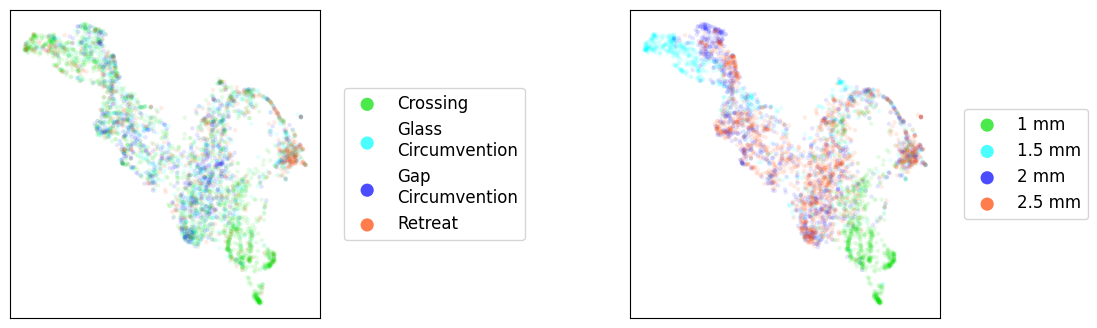

IsoD1_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


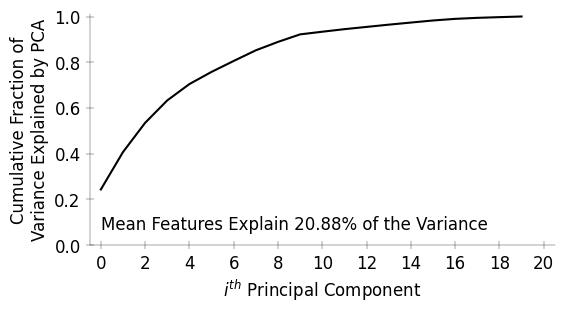

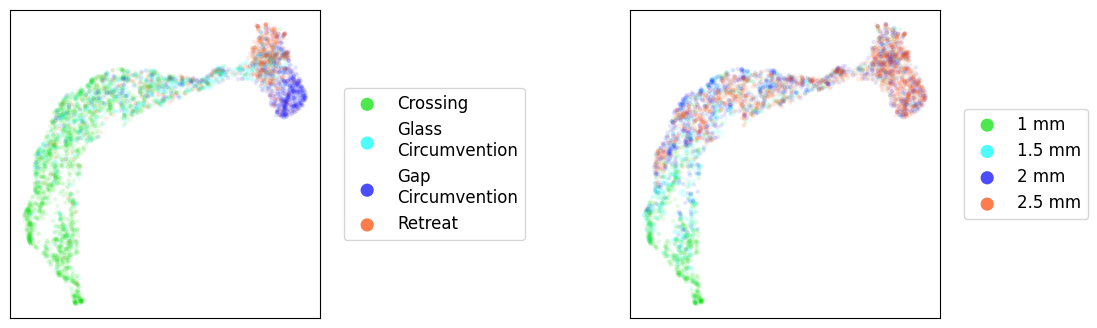

IsoD1_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


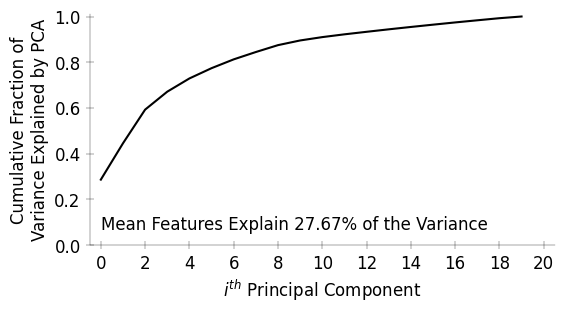

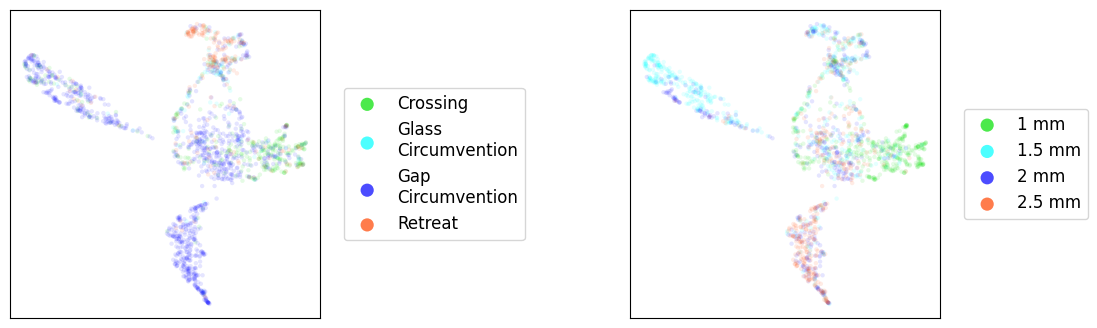

IsoD1_lighting_dark_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


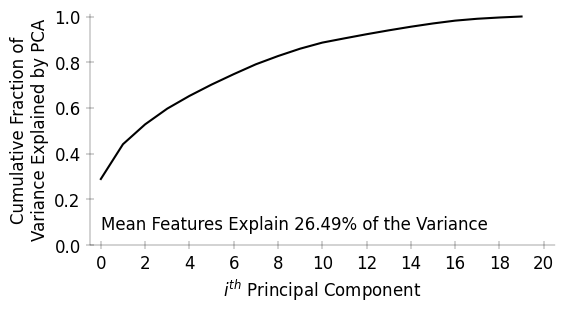

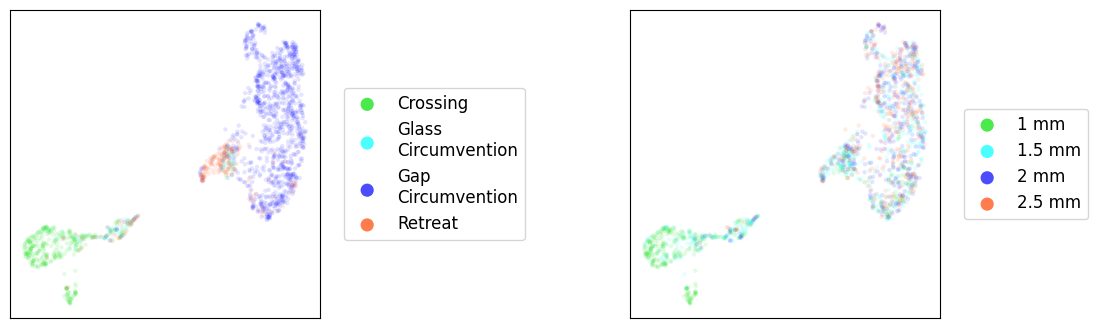

IsoD1_lighting_dark_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


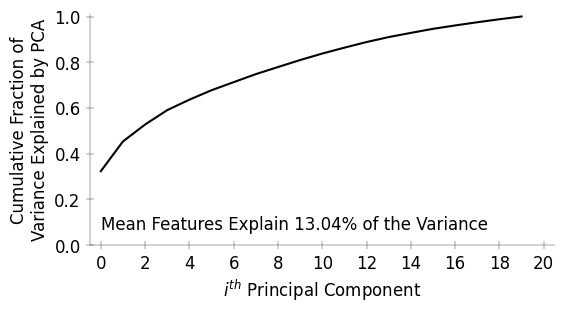

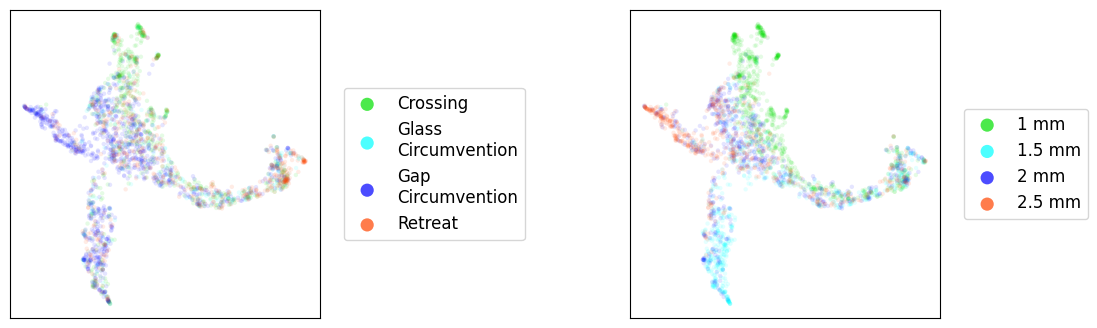

new_split_T4T5_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


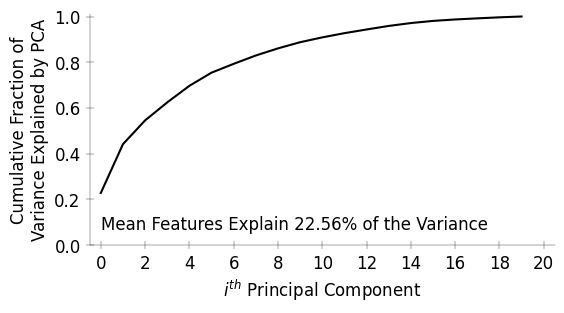

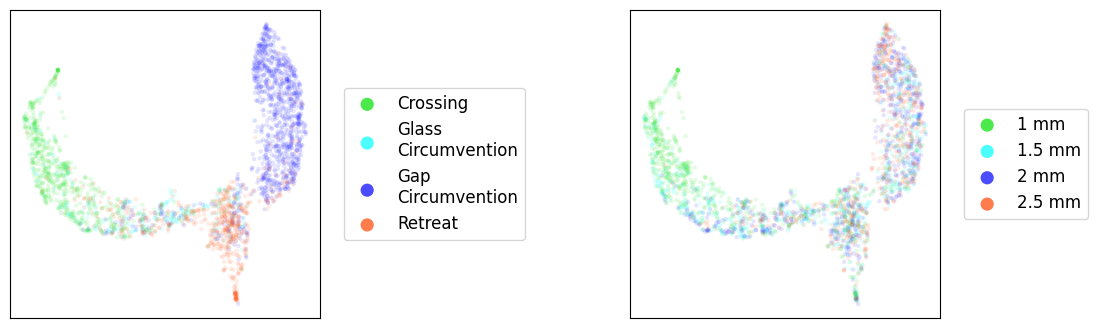

new_split_T4T5_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


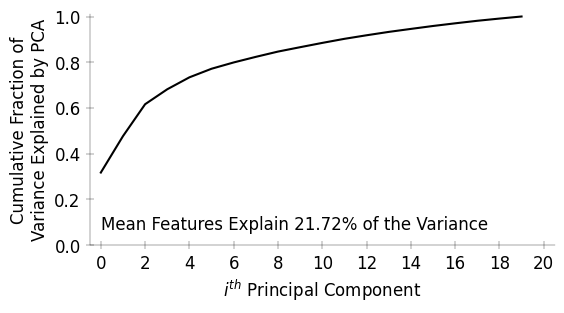

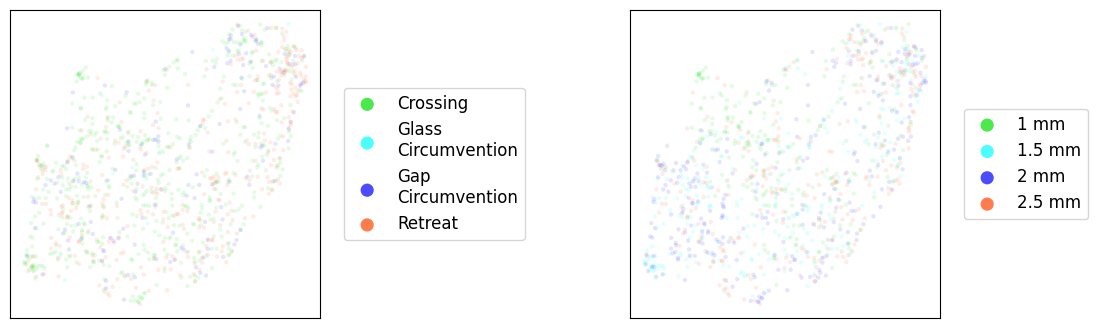

IsoD1_Nail_Polish_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


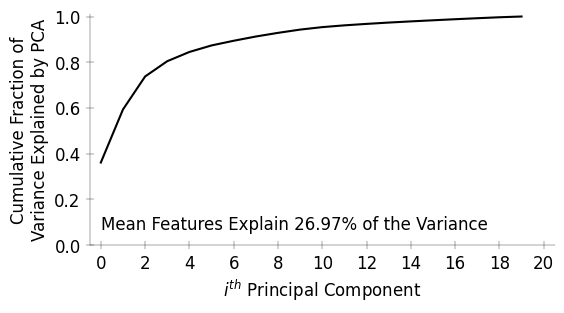

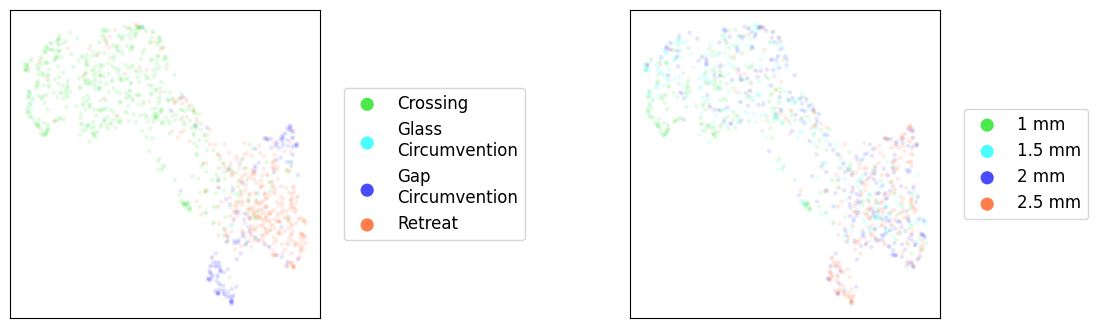

IsoD1_Nail_Polish_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


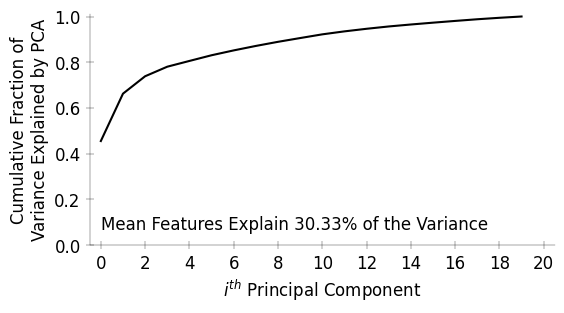

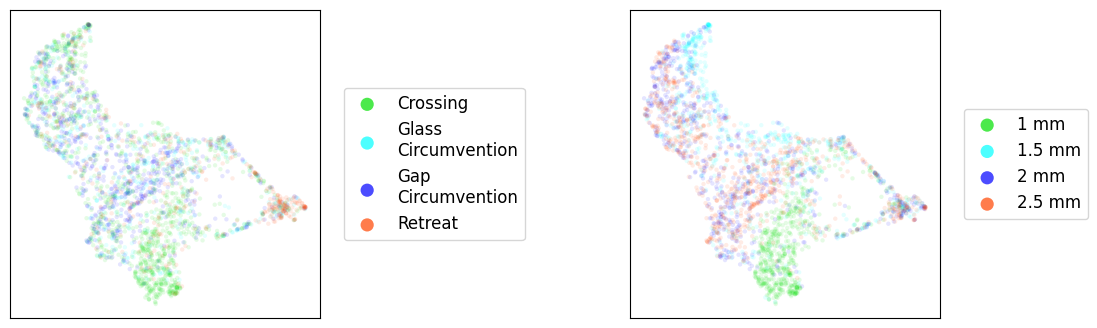

split_LC15_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


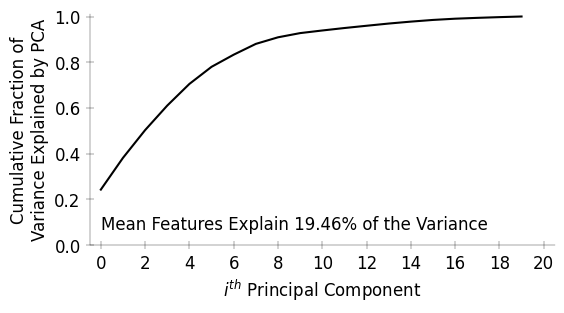

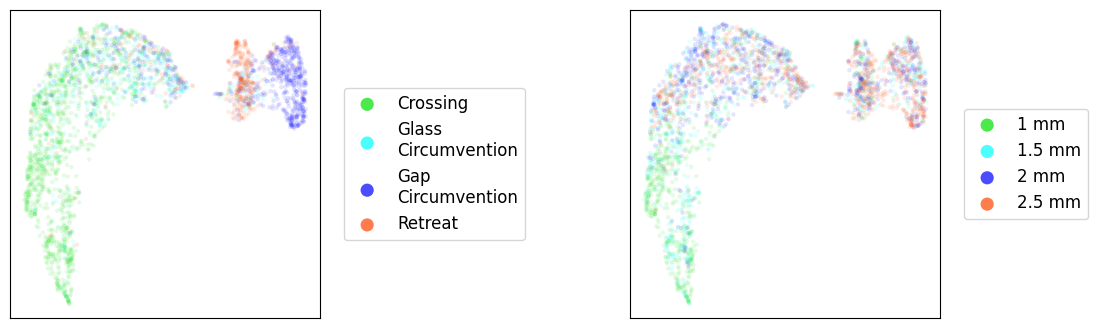

split_LC15_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_AfterEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat


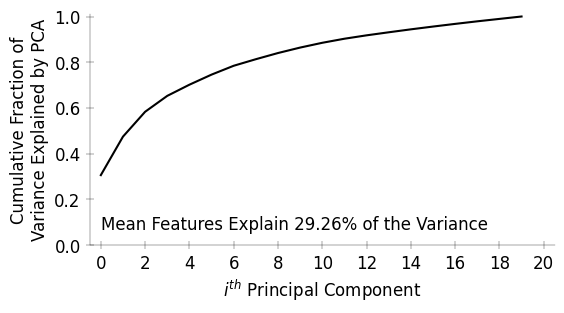

In [5]:
all_titles = [['Crossing', 'Glass\nCircumvention', 'Gap\nCircumvention', 'Retreat'], 
              ['1 mm', '1.5 mm', '2 mm', '2.5 mm']]
for file_name in file_names:
    mat = scipy.io.loadmat(home_dir + f'/data/{file_name}')
    events_list = mat['events_list'][:,0]
    gaps_list = mat['gaps_list'][:,0]
    predictors_mat = mat['predictors_mat']

    reducer = umap.UMAP()
    embedding = reducer.fit_transform(predictors_mat)
    color_lists = [events_list.copy(), gaps_list.copy()]

    min_x, max_x = np.min(embedding[:,0]), np.max(embedding[:,0])
    min_y, max_y = np.min(embedding[:,1]), np.max(embedding[:,1])

    xr = max_x-min_x
    yr = max_y-min_y

    fig, axes = plt.subplots(figsize=(12,4), nrows = 1, ncols = 2)
    for i_col, color_list in enumerate(color_lists):
        titles = all_titles[i_col]
        for label in np.unique(color_list):
            axes[i_col].scatter(embedding[color_list == label,0], embedding[color_list == label,1], edgecolors = 'none', s = 10, alpha = 0.1, color = colors_rgb[label-1], label = titles[label-1])
        axes[i_col].set_xlim([min_x - xr*0.05,max_x + xr*0.05])
        axes[i_col].set_ylim([min_y - yr*0.05,max_y + yr*0.05])
        axes[i_col].set_xticks([])
        axes[i_col].set_yticks([])
        leg = axes[i_col].legend(fontsize=fontsize, loc = 'center left', bbox_to_anchor = (1.05, 0.5), markerscale=3)
        for lh in leg.legend_handles: 
            lh.set_alpha(0.7)
    fig.subplots_adjust(wspace=1)
    plt.savefig(home_dir + f'/Figures/Scatter_{file_name[:-4]}.svg', transparent=True, bbox_inches='tight')
    plt.show()

    xvals = np.linspace(min_x, max_x, 150)
    yvals = np.linspace(min_y, max_y, 150)
    xv, yv = np.meshgrid(xvals, yvals, indexing='xy')
    vals = np.array( [xv.flatten(), yv.flatten()] ).T
    fontsize=12
    fig, axes = plt.subplots(figsize=(9,9), nrows = 5, ncols = 5)
    for col, event in enumerate(np.unique(events_list)):
        axes[0,col].set_title(all_titles[0][col], fontsize=fontsize)
        for row, gap in enumerate(np.unique(gaps_list)):
            axes[row,0].set_ylabel(all_titles[1][row], fontsize=fontsize)
            bool_points = np.all([events_list == event, gaps_list == gap],axis=0)
            if np.sum(bool_points) > 10:
                label_coords = embedding[bool_points]

                # KDE
                X = pdist(label_coords)
                h = 0.9 * np.min( [np.std(X), IQR(X) / 1.34] ) * (len(label_coords)**(-1/5))
                kde = KernelDensity(kernel='gaussian', bandwidth = h).fit(label_coords)
                probs = np.exp(kde.score_samples(vals))
                probs /= np.sum(probs)
                axes[row,col].imshow(np.flip(probs.reshape((len(yvals),len(xvals))),axis=0))
                axes[row,col].set_xticks([])
                axes[row,col].set_yticks([])
            else:
                axes[row,col].imshow( np.zeros( (len(yvals), len(xvals)) ) )
                axes[row,col].set_xticks([])
                axes[row,col].set_yticks([])

            axes[row,col].text(0,150, f'{int(np.sum(bool_points))}', ha='left', va='bottom',  color = 'white')

            if col == 3 and row == 3:
                # plot all gaps
                bool_points = events_list == event
                drow = 0; dcol=1
                # KDE
                label_coords = embedding[bool_points]
                X = pdist(label_coords)
                h = 0.9 * np.min( [np.std(X), IQR(X) / 1.34] ) * (len(label_coords)**(-1/5))
                kde = KernelDensity(kernel='gaussian', bandwidth = h).fit(label_coords)
                probs = np.exp(kde.score_samples(vals))
                probs /= np.sum(probs)
                axes[row+drow,col+dcol].imshow(np.flip(probs.reshape((len(yvals),len(xvals))),axis=0))
                axes[row+drow,col+dcol].set_xticks([])
                axes[row+drow,col+dcol].set_yticks([])
                axes[row+drow,col+dcol].text(0,150, f'{int(np.sum(bool_points))}', ha='left', va='bottom',  color = 'white')

                # plot all events
                bool_points = gaps_list == gap
                drow = 1; dcol = 0
                # KDE
                label_coords = embedding[bool_points]
                X = pdist(label_coords)
                h = 0.9 * np.min( [np.std(X), IQR(X) / 1.34] ) * (len(label_coords)**(-1/5))
                kde = KernelDensity(kernel='gaussian', bandwidth = h).fit(label_coords)
                probs = np.exp(kde.score_samples(vals))
                probs /= np.sum(probs)
                axes[row+drow,col+dcol].imshow(np.flip(probs.reshape((len(yvals),len(xvals))),axis=0))
                axes[row+drow,col+dcol].set_xticks([])
                axes[row+drow,col+dcol].set_yticks([])
                axes[row+drow,col+dcol].text(0,150, f'{int(np.sum(bool_points))}', ha='left', va='bottom',  color = 'white')

                # plot everything
                drow = 1; dcol = 1
                label_coords = embedding.copy()
                X = pdist(label_coords)
                h = 0.9 * np.min( [np.std(X), IQR(X) / 1.34] ) * (len(label_coords)**(-1/5))
                kde = KernelDensity(kernel='gaussian', bandwidth = h).fit(label_coords)
                probs = np.exp(kde.score_samples(vals))
                probs /= np.sum(probs)
                axes[row+drow,col+dcol].imshow(np.flip(probs.reshape((len(yvals),len(xvals))),axis=0))
                axes[row+drow,col+dcol].set_xticks([])
                axes[row+drow,col+dcol].set_yticks([])
                axes[row+drow,col+dcol].text(0,150, f'{len(label_coords)}', ha='left', va='bottom',  color = 'white')
            elif col == 3:
                # plot all gaps
                bool_points = events_list == event
                drow = 0; dcol=1
                axes[-1,0].set_ylabel('All Gaps', fontsize=fontsize)

                # KDE
                label_coords = embedding[bool_points]
                X = pdist(label_coords)
                h = 0.9 * np.min( [np.std(X), IQR(X) / 1.34] ) * (len(label_coords)**(-1/5))
                kde = KernelDensity(kernel='gaussian', bandwidth = h).fit(label_coords)
                probs = np.exp(kde.score_samples(vals))
                probs /= np.sum(probs)
                axes[row+drow,col+dcol].imshow(np.flip(probs.reshape((len(yvals),len(xvals))),axis=0))
                axes[row+drow,col+dcol].set_xticks([])
                axes[row+drow,col+dcol].set_yticks([])
                axes[row+drow,col+dcol].text(0,150, f'{int(np.sum(bool_points))}', ha='left', va='bottom',  color = 'white')
            elif row == 3:
                # plot all events
                bool_points = gaps_list == gap
                drow = 1; dcol = 0

                # KDE
                label_coords = embedding[bool_points]
                X = pdist(label_coords)
                h = 0.9 * np.min( [np.std(X), IQR(X) / 1.34] ) * (len(label_coords)**(-1/5))
                kde = KernelDensity(kernel='gaussian', bandwidth = h).fit(label_coords)
                probs = np.exp(kde.score_samples(vals))
                probs /= np.sum(probs)
                axes[row+drow,col+dcol].imshow(np.flip(probs.reshape((len(yvals),len(xvals))),axis=0))
                axes[row+drow,col+dcol].set_xticks([])
                axes[row+drow,col+dcol].set_yticks([])
                axes[row+drow,col+dcol].text(0,150, f'{int(np.sum(bool_points))}', ha='left', va='bottom',  color = 'white')

        axes[0,-1].set_title('All Events', fontsize=fontsize)
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    fig.suptitle(file_name, fontsize=fontsize)
    print(file_name)
    plt.savefig(home_dir + f'/Figures/KDE_{file_name[:-4]}.svg', transparent=True, bbox_inches='tight')
    plt.close()


    pca = PCA()
    pca.fit(predictors_mat)
    
    frac_variance = np.cumsum(pca.explained_variance_ratio_)
    fig, ax = plt.subplots(figsize=(6,3))
    fontsize=12
    ax.plot(np.arange(predictors_mat.shape[1]), frac_variance, color = 'k')
    format_axes(ax, fontsize)
    ax.set_ylabel('Cumulative Fraction of\nVariance Explained by PCA', fontsize=fontsize)
    ax.set_ylim([0,1.01])
    ax.set_xlim([-0.5, predictors_mat.shape[1]+0.5])
    ax.set_xticks(np.arange(0, predictors_mat.shape[1]+1, 2))
    ax.set_xlabel(r'$i^{th}$' + ' Principal Component', fontsize=fontsize)

    vec = np.nanmean(predictors_mat,axis=0)
    vec = vec / np.sqrt(np.sum(vec**2))
    frac_variance = np.round(np.sum( np.matmul(pca.get_covariance(), vec) * vec) / np.sum(pca.explained_variance_) * 100, decimals = 2)
    ax.text(0, 0.05, f'Mean Features Explain {frac_variance}% of the Variance', fontsize=fontsize, va = 'bottom')
    
    plt.savefig(home_dir + f'/Figures/VarianceFraction_{file_name[:-4]}.svg', transparent=True, bbox_inches='tight')
    plt.show()

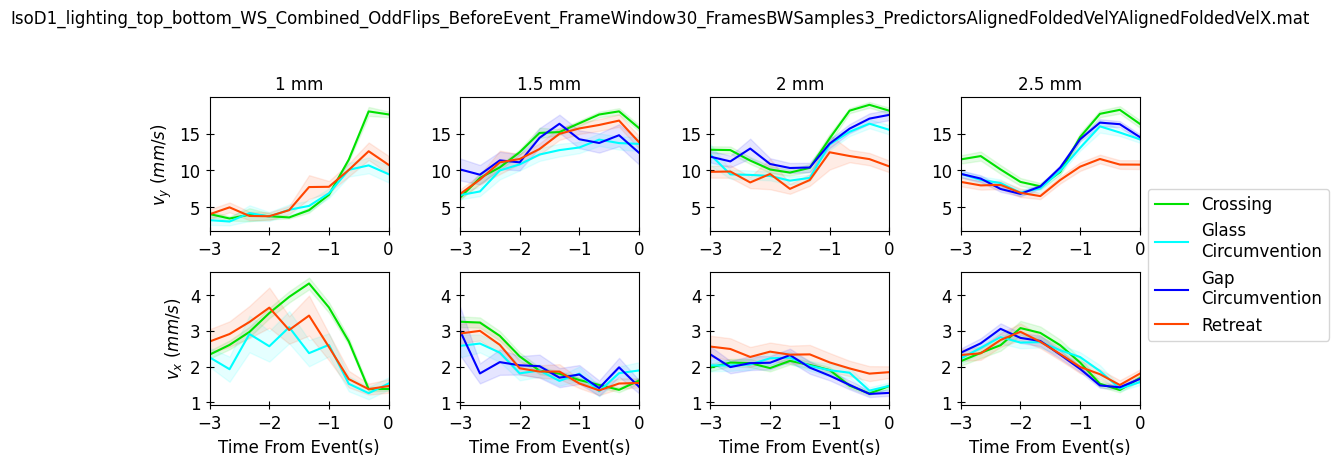

Finished


In [6]:
for file_name in file_names:
    mat = scipy.io.loadmat(home_dir + f'/data/{file_name}')
    events_list = mat['events_list'][:,0]
    gaps_list = mat['gaps_list'][:,0]
    predictors_mat = mat['predictors_mat']
    t = np.arange(10)/3 if 'After' in file_name else np.arange(10)/3 - 3

    fig, axes = plt.subplots(figsize=(12,4), nrows=2, ncols=4)
    fontsize=12
    for i_feat_group in range(2):
        row_label = r'$v_x$' if i_feat_group == 1 else r'$v_y$'
        axes[i_feat_group,0].set_ylabel(row_label + ' ' + r'$(mm/s)$', fontsize=fontsize)
        for i_gap in range(1,5):
            col_label = all_titles[1][i_gap-1]
            axes[0,i_gap-1].set_title(col_label, fontsize=fontsize)
            axes[i_feat_group,i_gap-1].tick_params(axis='both', which='major', labelsize=fontsize, direction = 'inout', length=6)
            axes[i_feat_group,i_gap-1].set_xlim([t[0], t[-1]])
            #axes[i_feat_group,i_event-1].set_ylim([0,17])
            axes[1,i_gap-1].set_xlabel('Time From Event(s)', fontsize=fontsize)
            for i_event in range(1,5):
                bool_points = np.all([gaps_list==i_gap, events_list==i_event], axis=0)
                if np.sum(bool_points) >= 10:
                    mean_vals = np.mean(np.abs(predictors_mat[bool_points,:]),axis=0)[np.arange(i_feat_group*10, (1+i_feat_group)*10)]
                    std_vals = np.std(np.abs(predictors_mat[bool_points,:]),axis=0)[np.arange(i_feat_group*10, (1+i_feat_group)*10)] / np.sqrt(np.sum(bool_points))#/ np.sqrt(np.sum(bool_points))
                    
                    axes[i_feat_group,i_gap-1].plot(t, mean_vals, label = all_titles[0][i_event-1], color = colors_rgb[i_event-1])
                    axes[i_feat_group,i_gap-1].fill_between(t, mean_vals+std_vals, y2=mean_vals-std_vals, alpha = 0.1, color = colors_rgb[i_event-1])
    for row in range(2):
        ymin = np.inf; ymax = -np.inf
        for col in range(4):
            ymin = np.min([ymin, axes[row,col].get_ylim()[0]])
            ymax = np.max([ymax, axes[row,col].get_ylim()[1]])
        for col in range(4):
            axes[row,col].set_ylim([ymin,ymax])

    fig.subplots_adjust(wspace=0.4, hspace=0.3)
    fig.suptitle(file_name, fontsize=fontsize, y=1.1)
    axes[-1,-1].legend(fontsize=fontsize, bbox_to_anchor = (1,1.05), loc = 'center left')
    plt.savefig(home_dir + f'/Figures/FeatureDistribution/FeatureDistribution_{file_name[:-4]}.svg', transparent=True, bbox_inches='tight')
    if file_name == file_names[0]:
        plt.show()
    else:
        plt.close()
print('Finished')

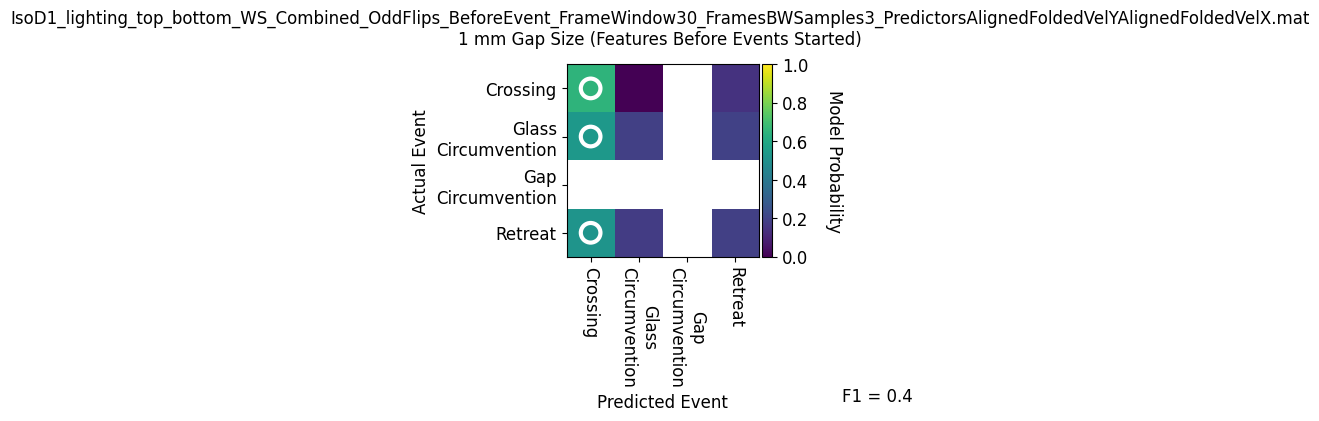

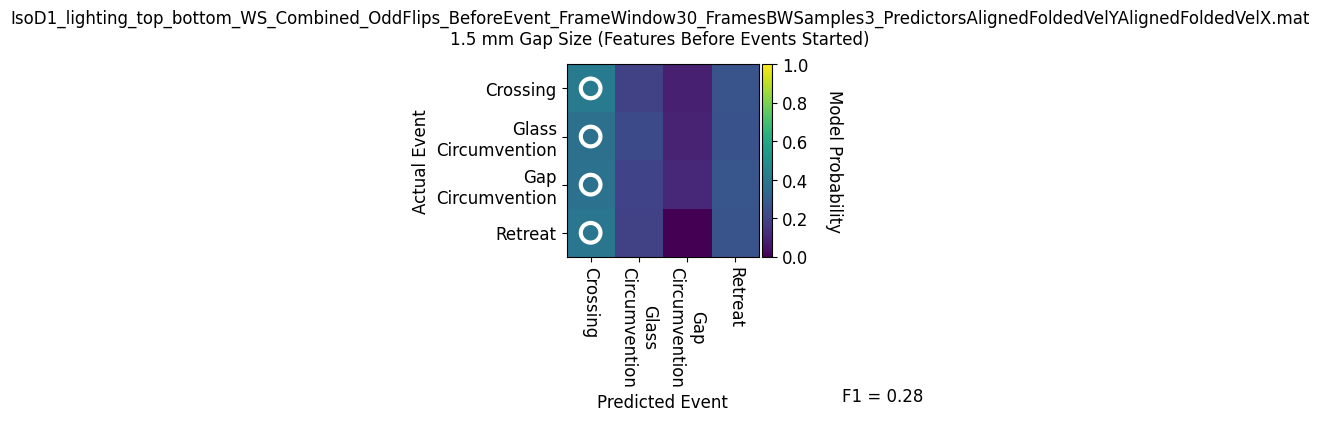

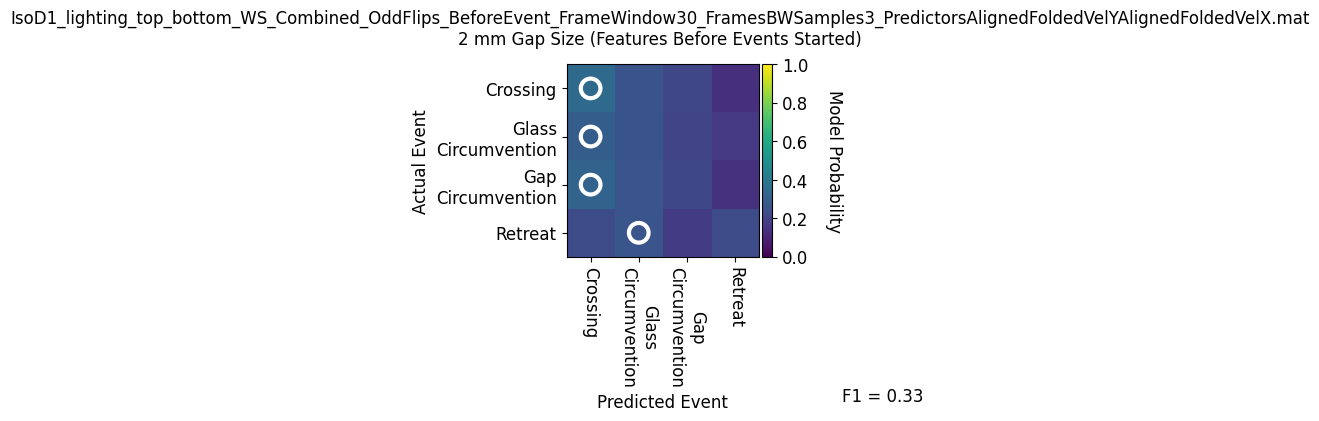

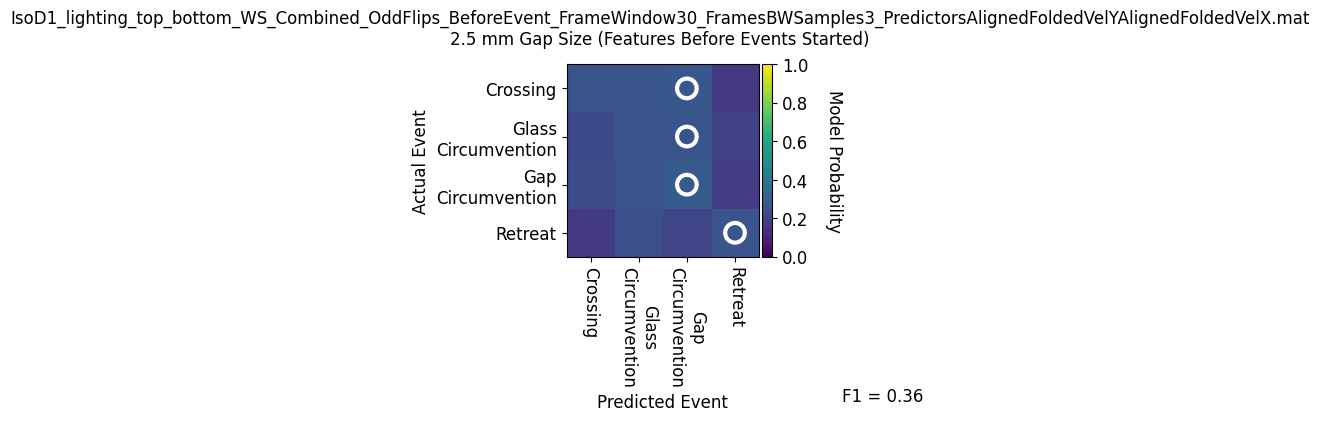

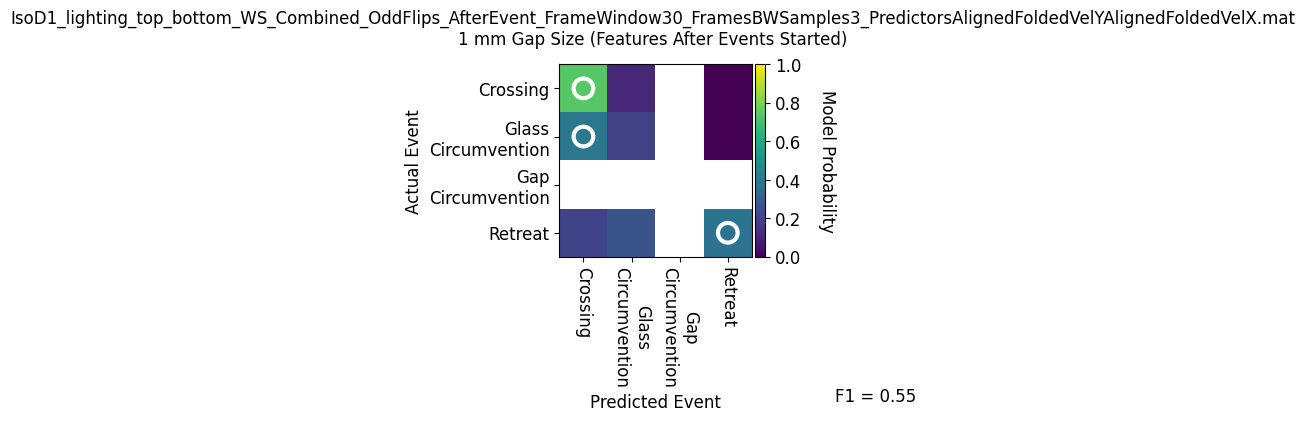

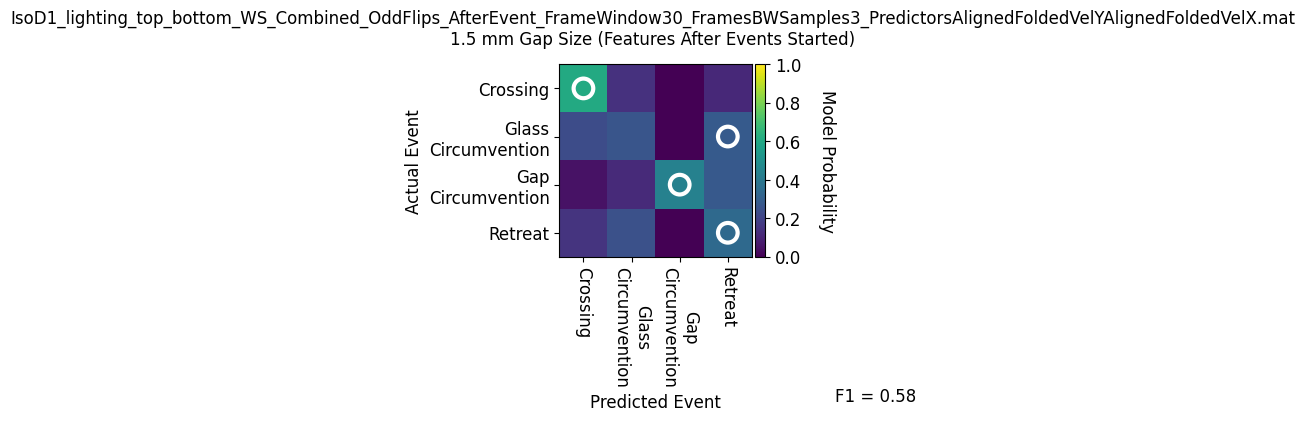

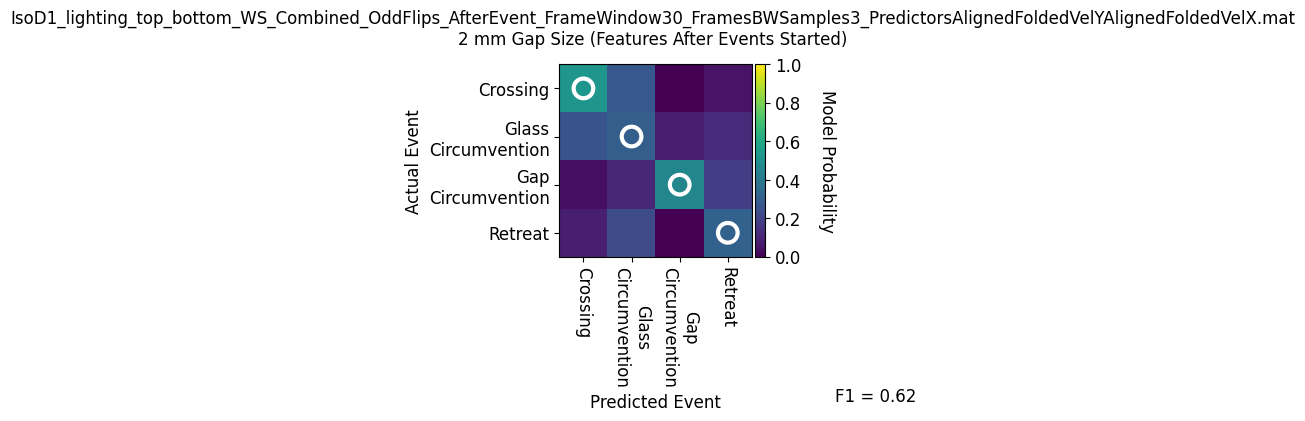

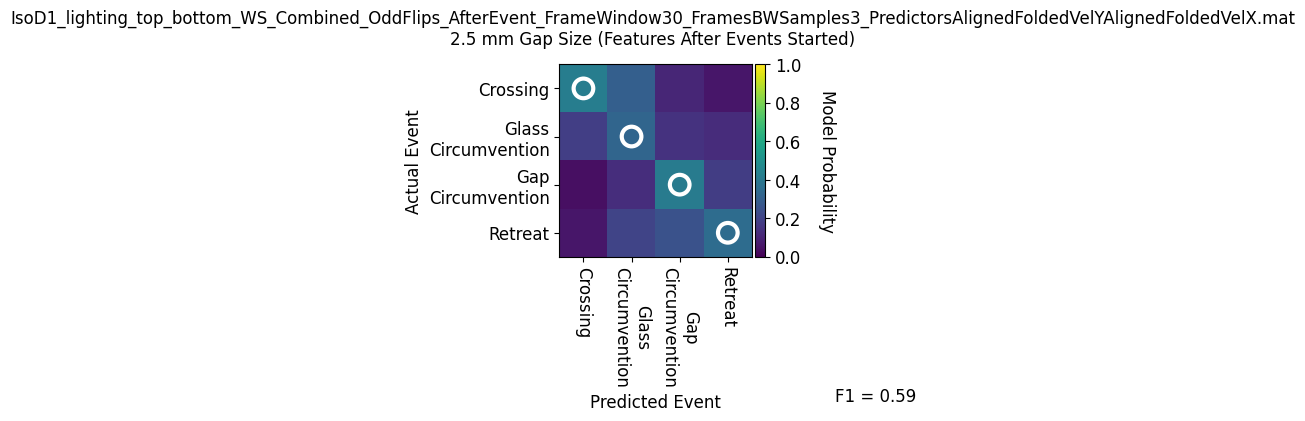

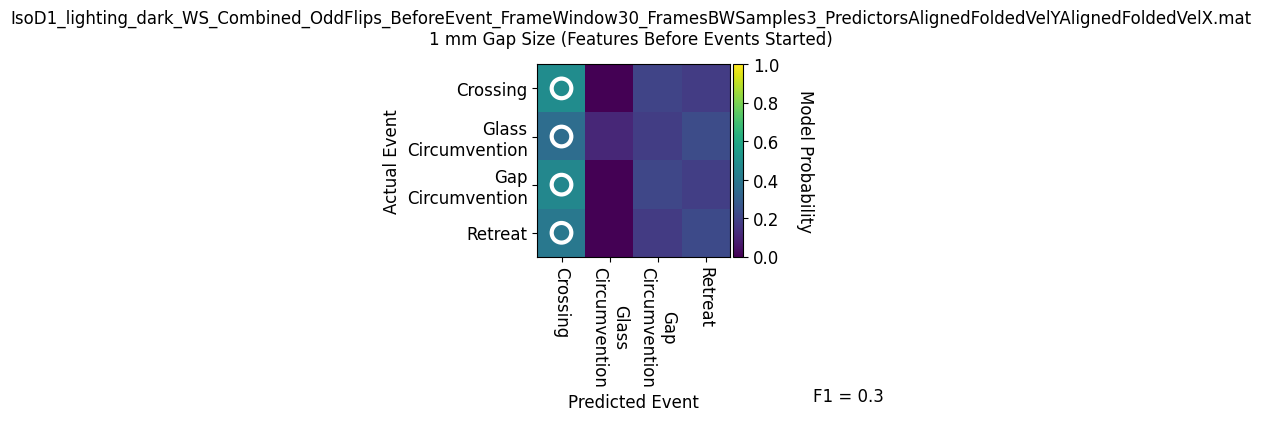

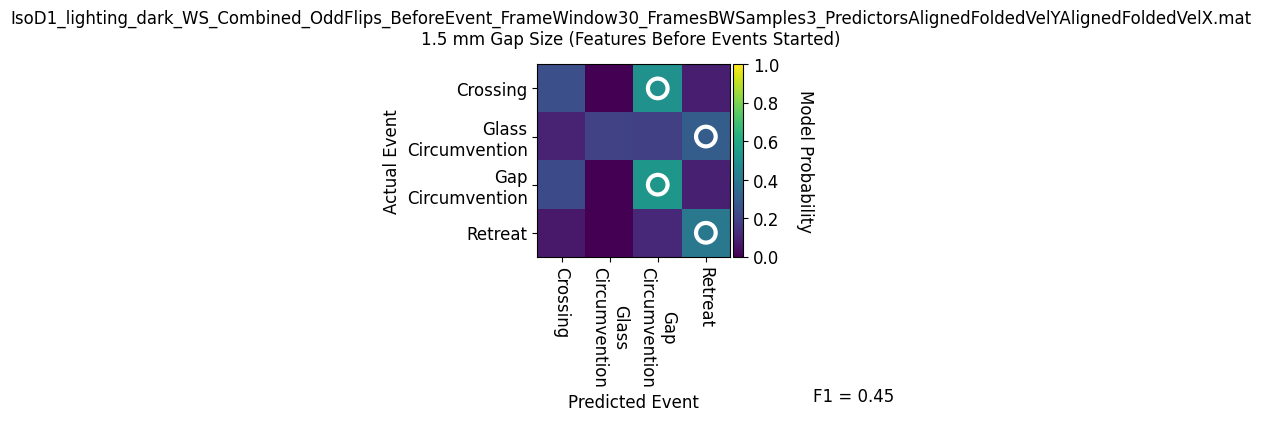

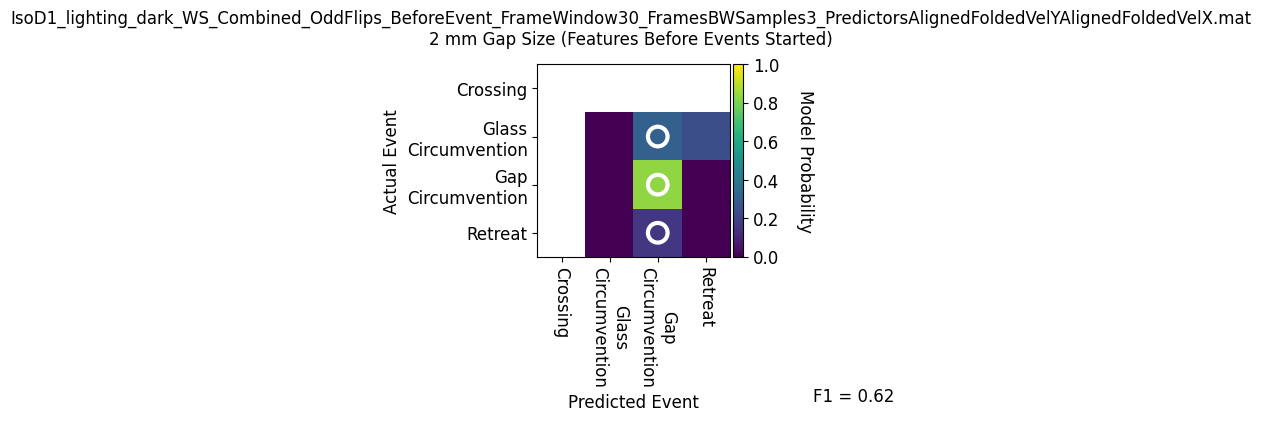

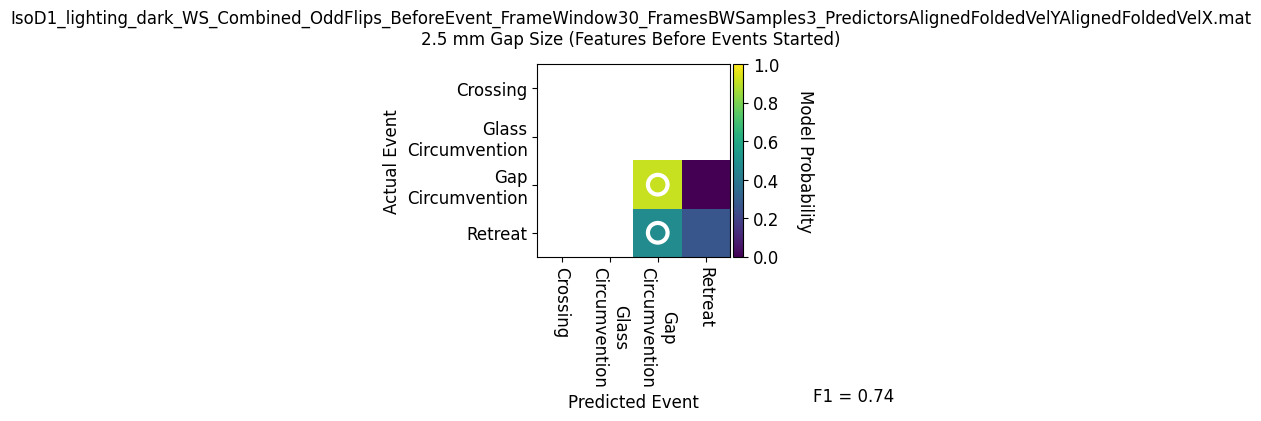

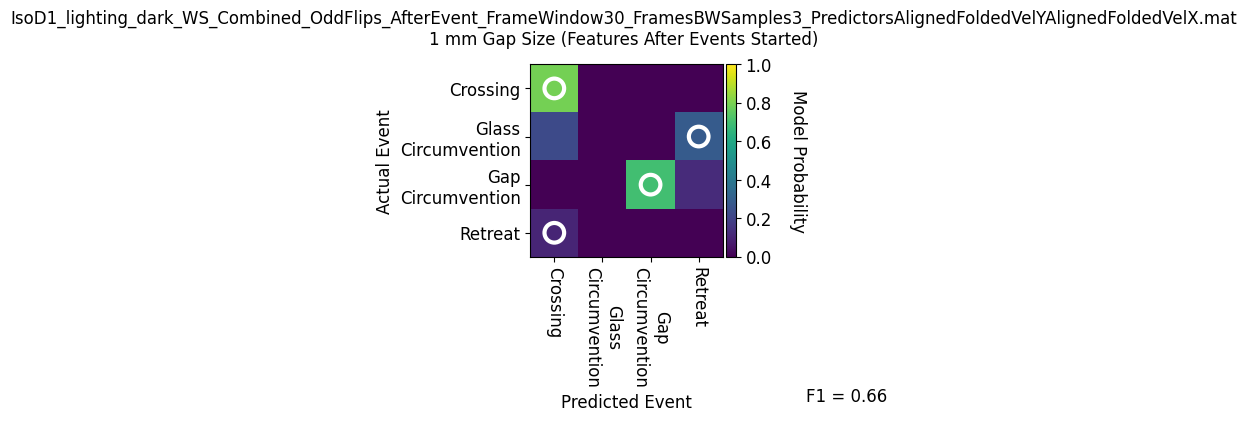

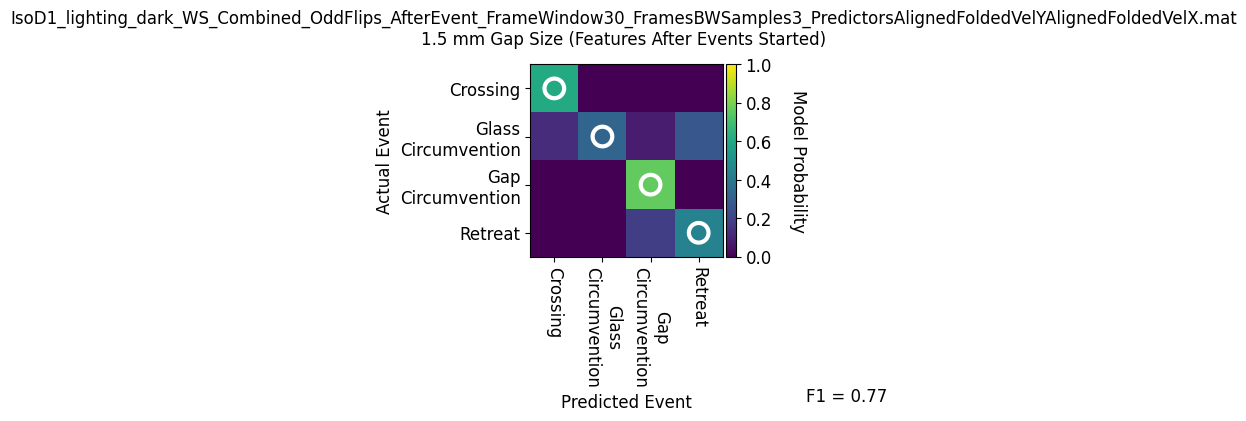

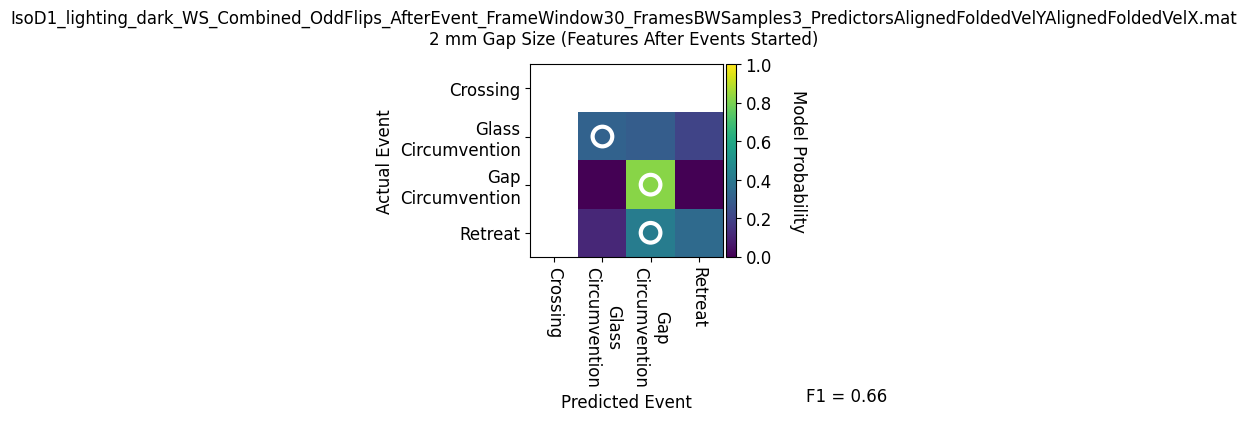

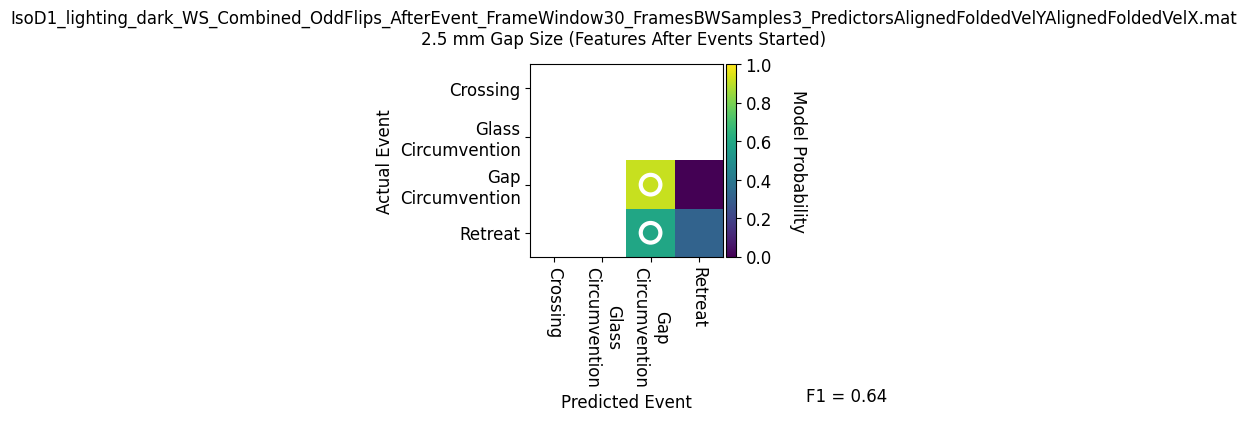

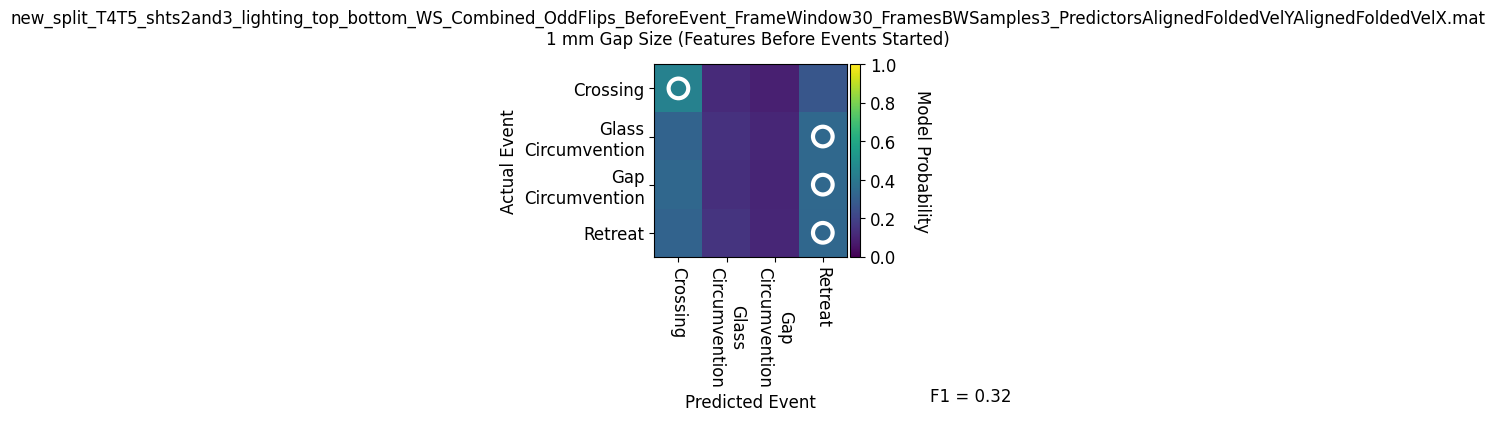

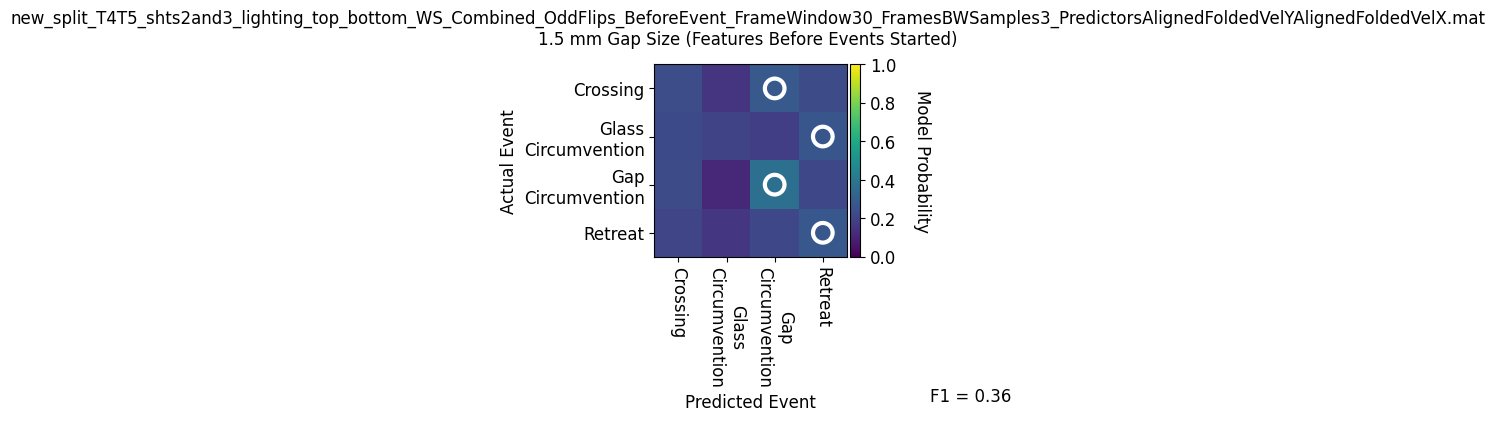

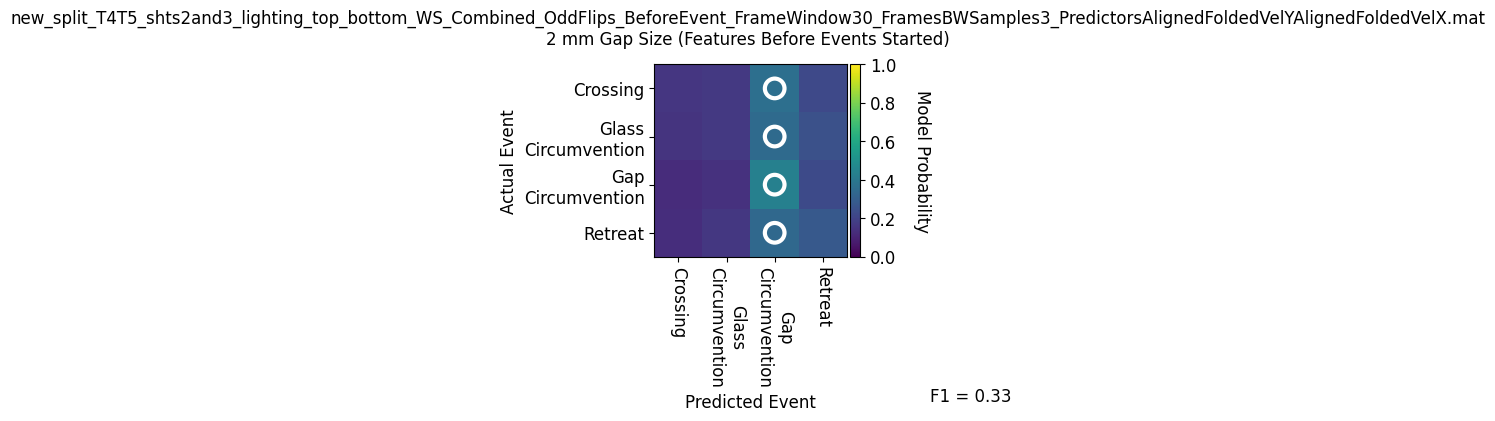

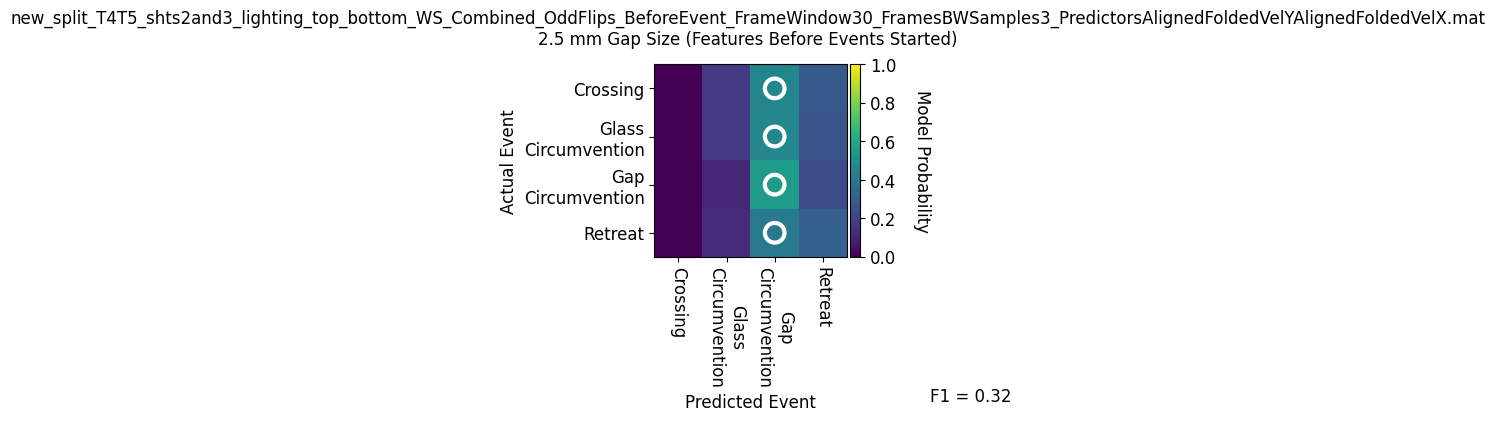

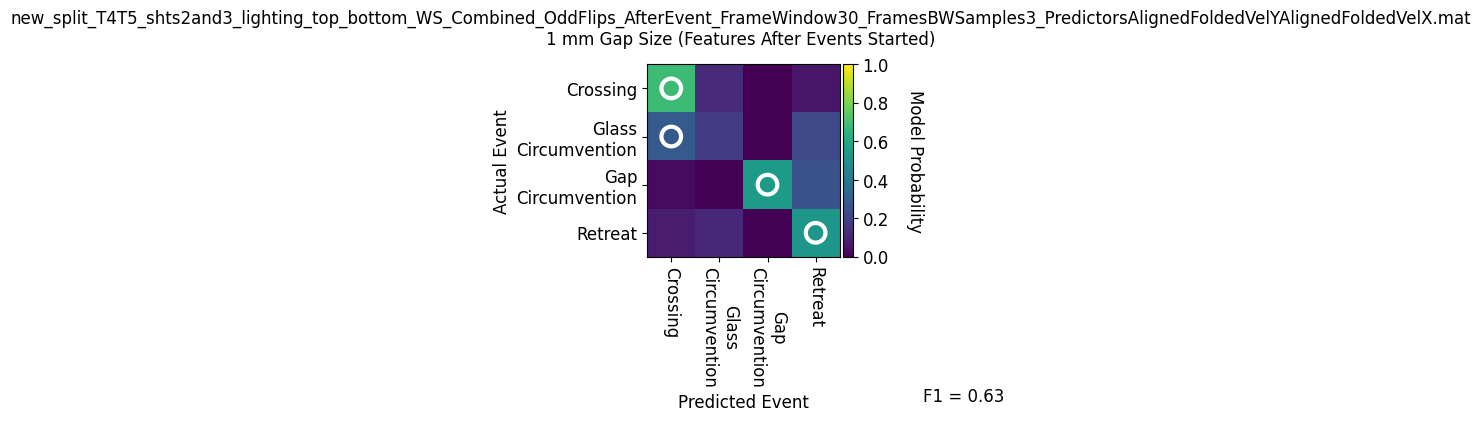

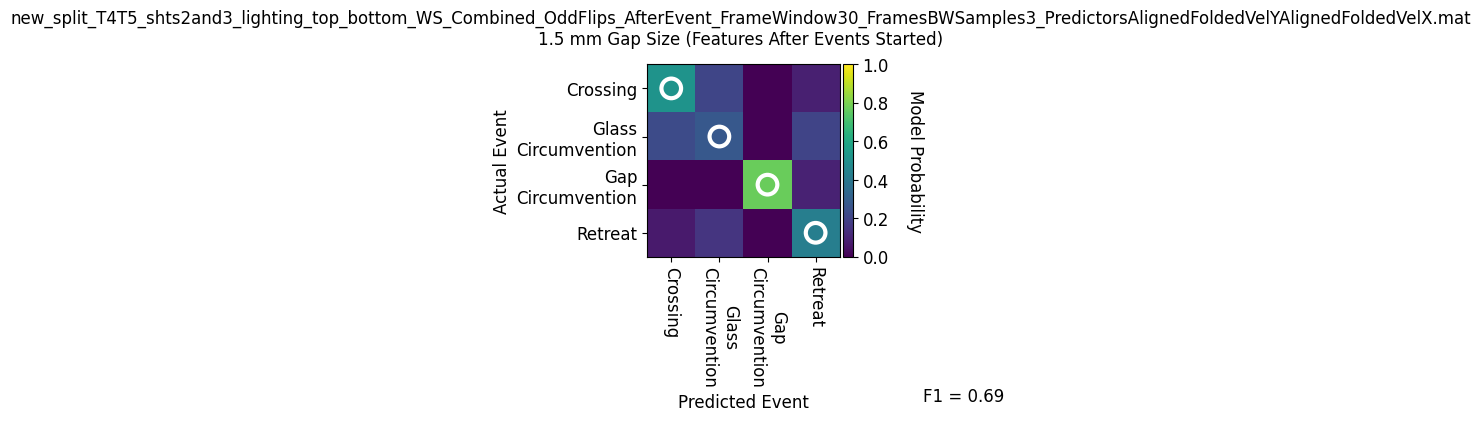

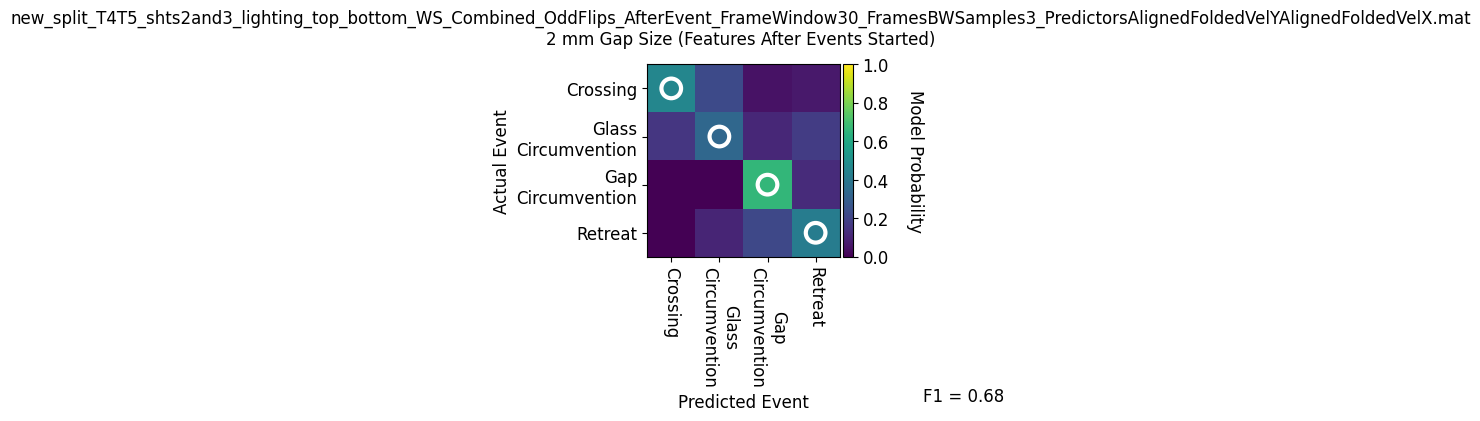

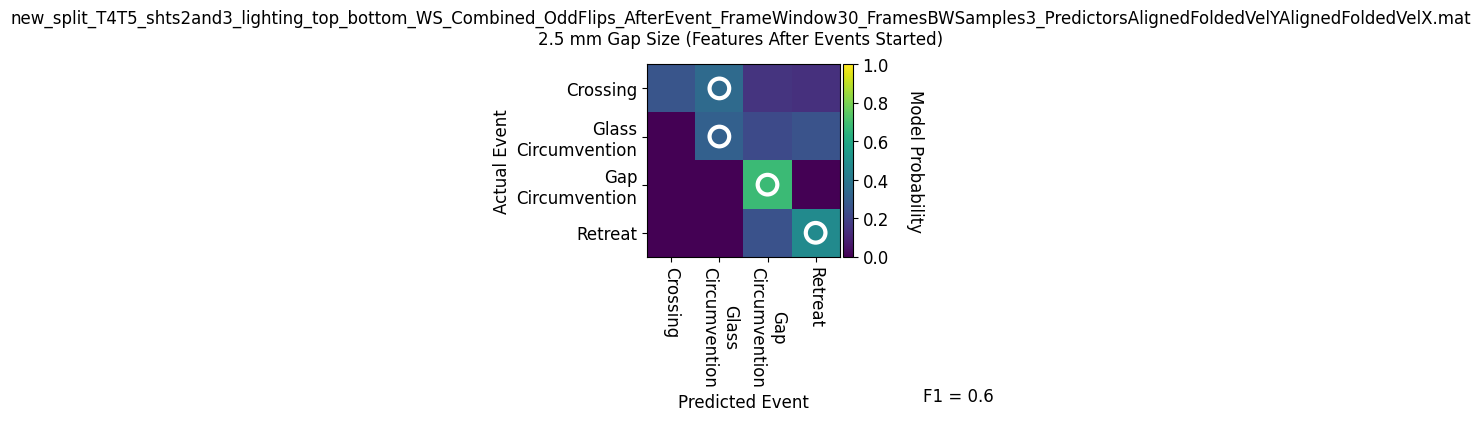

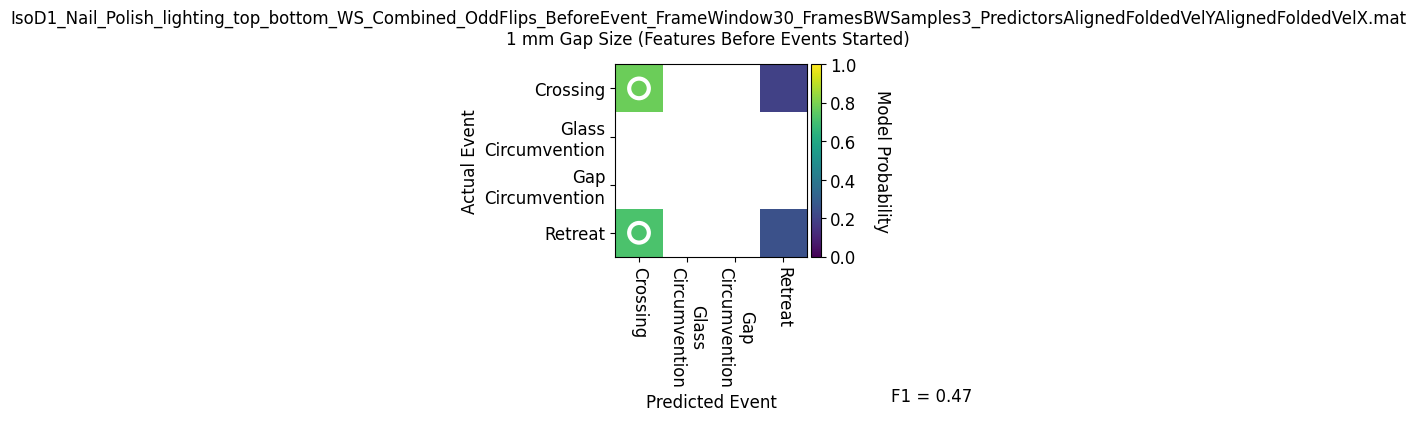

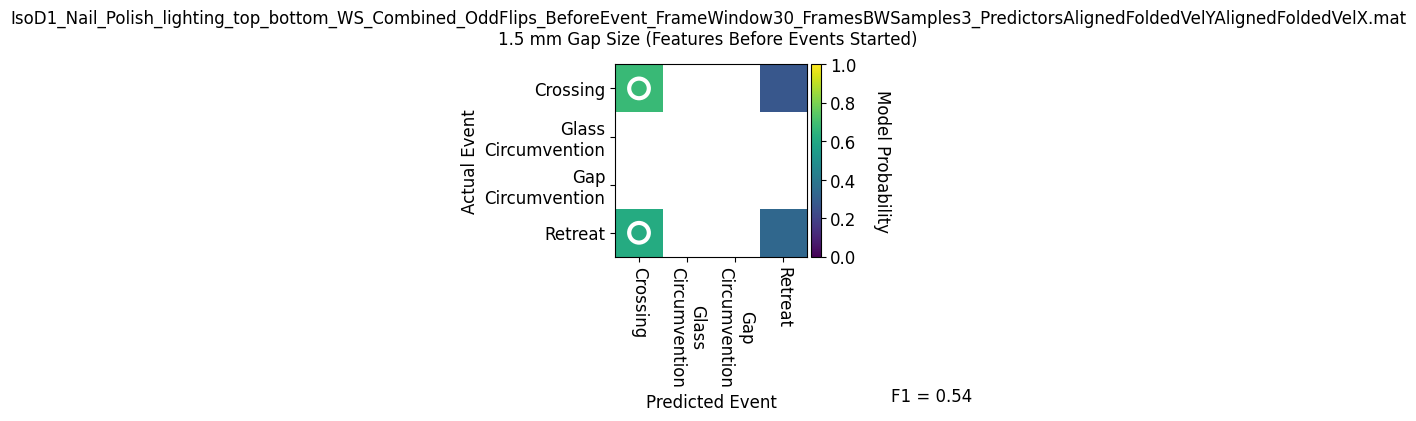

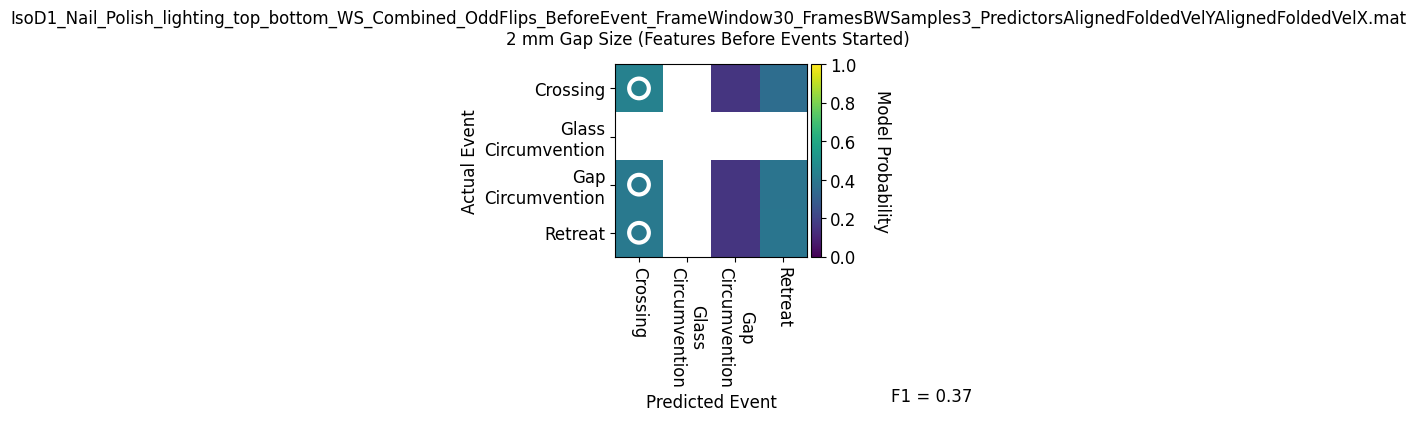

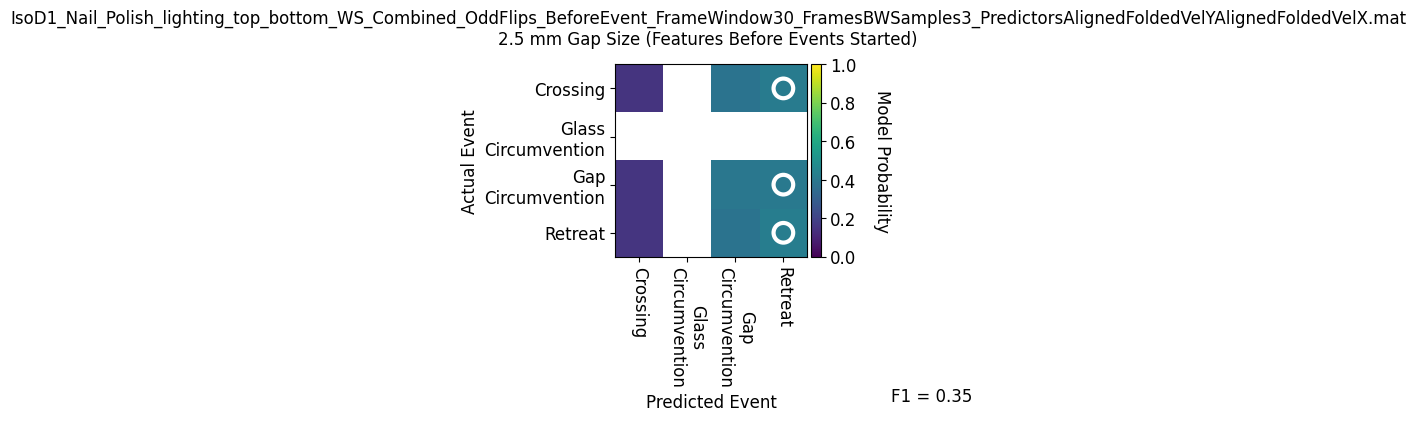

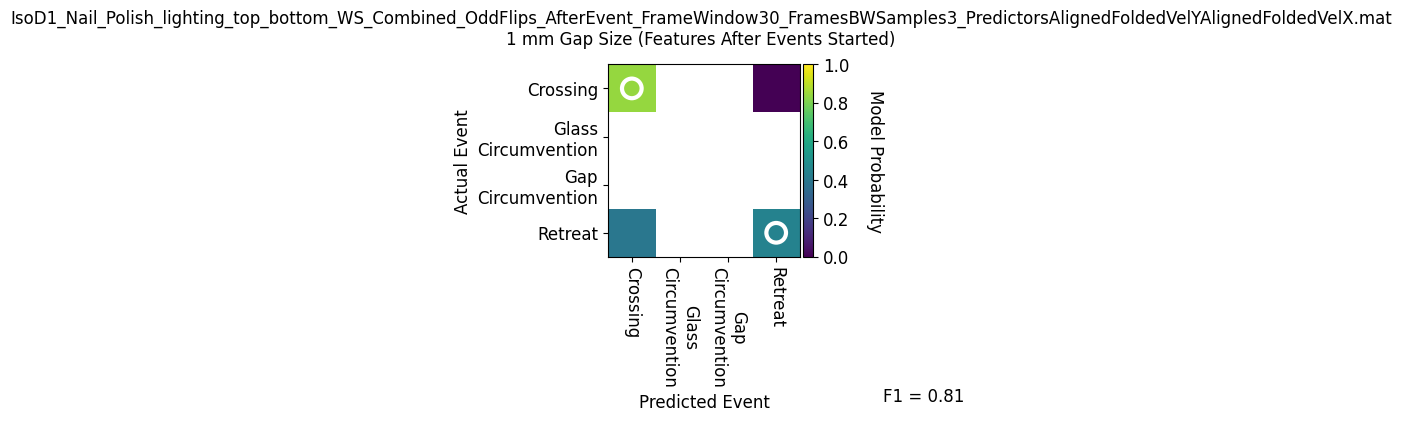

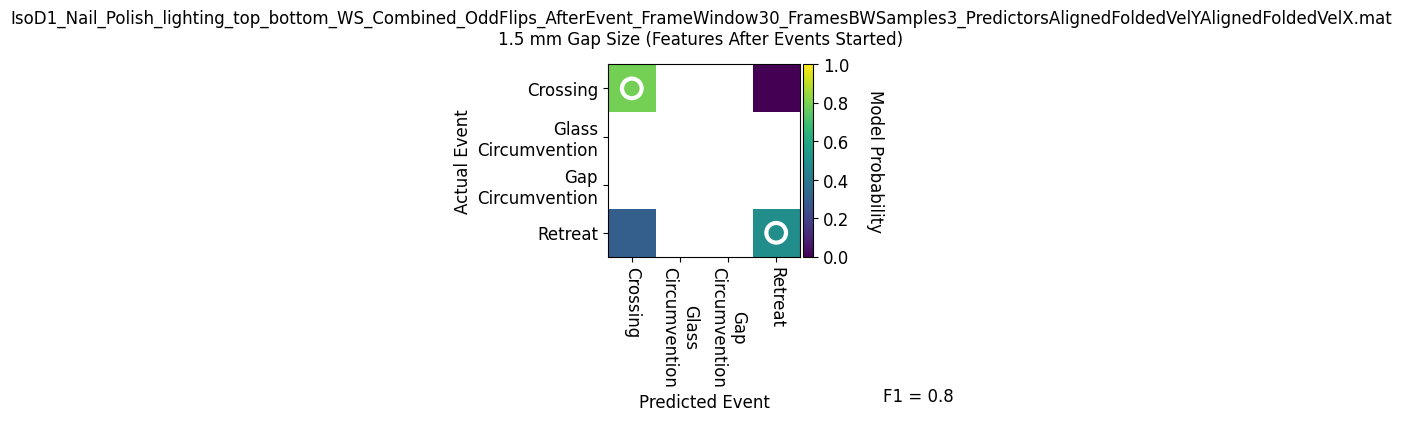

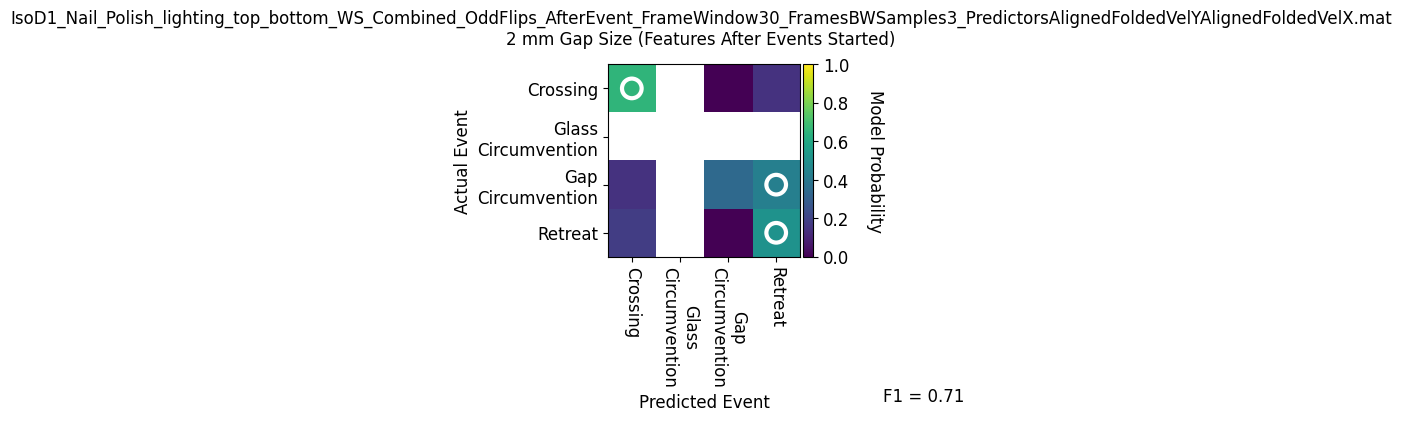

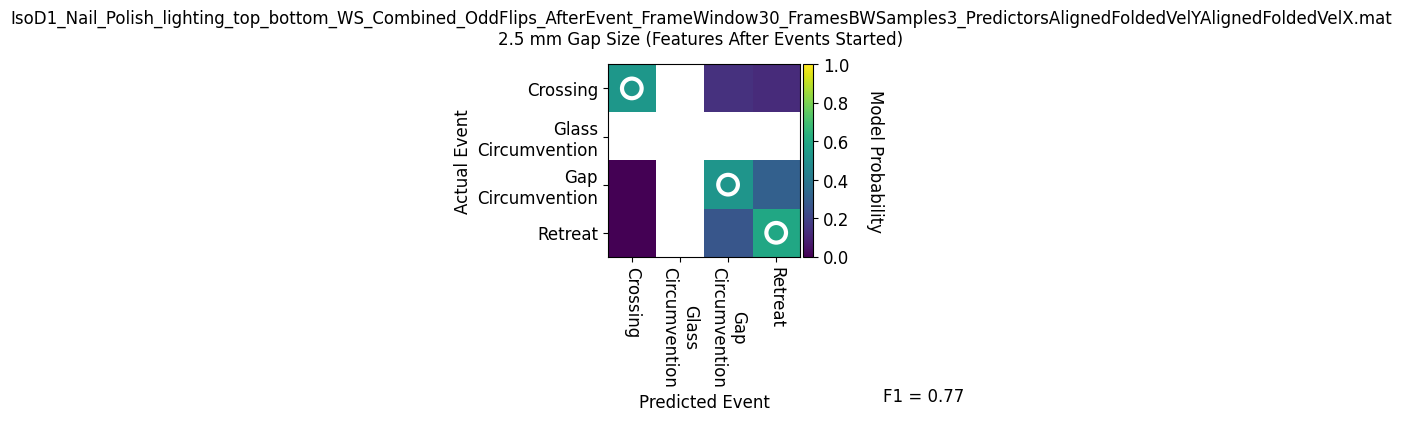

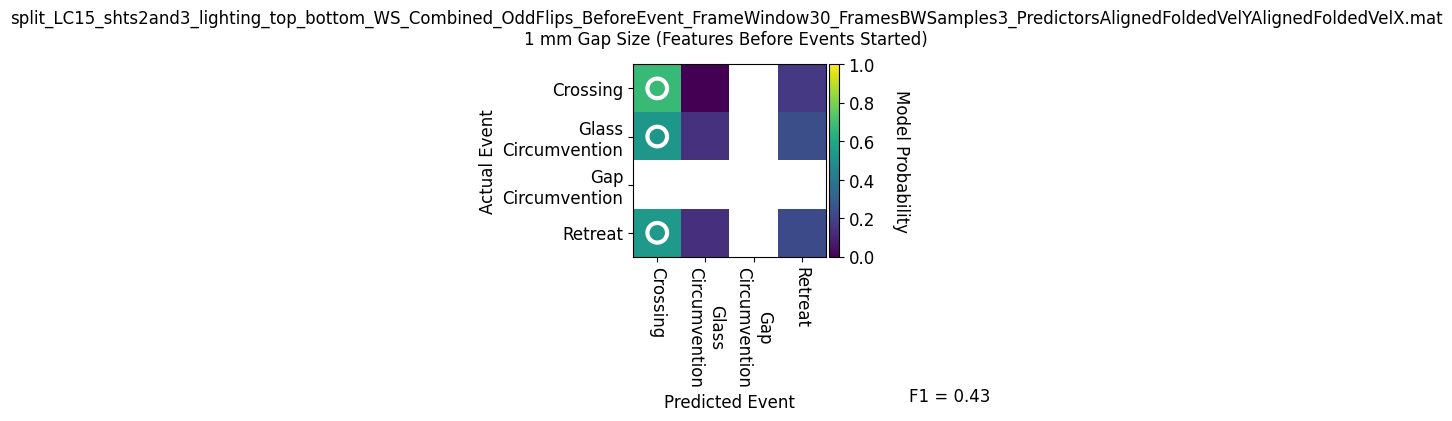

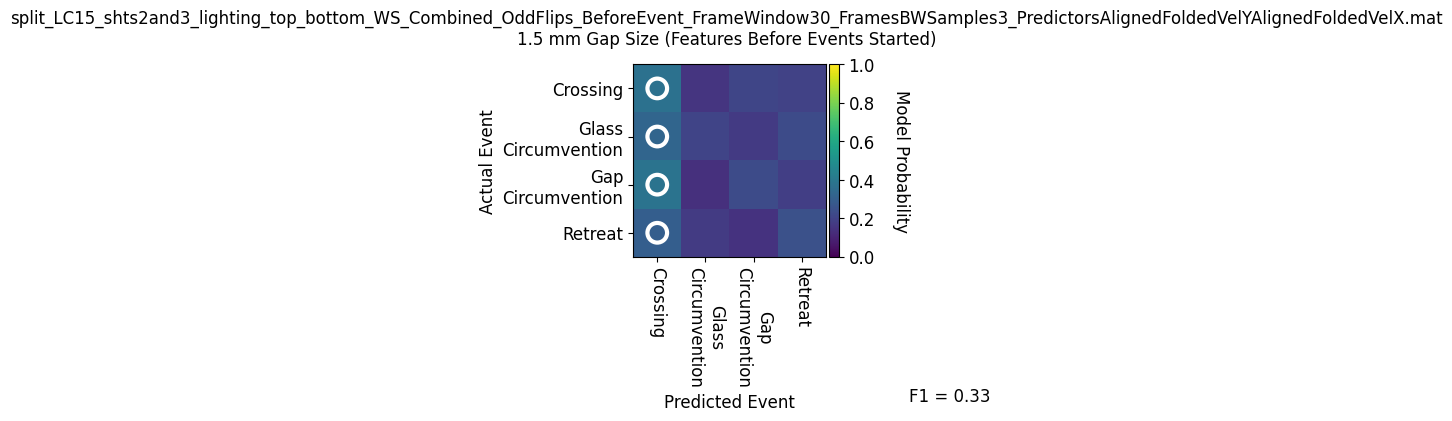

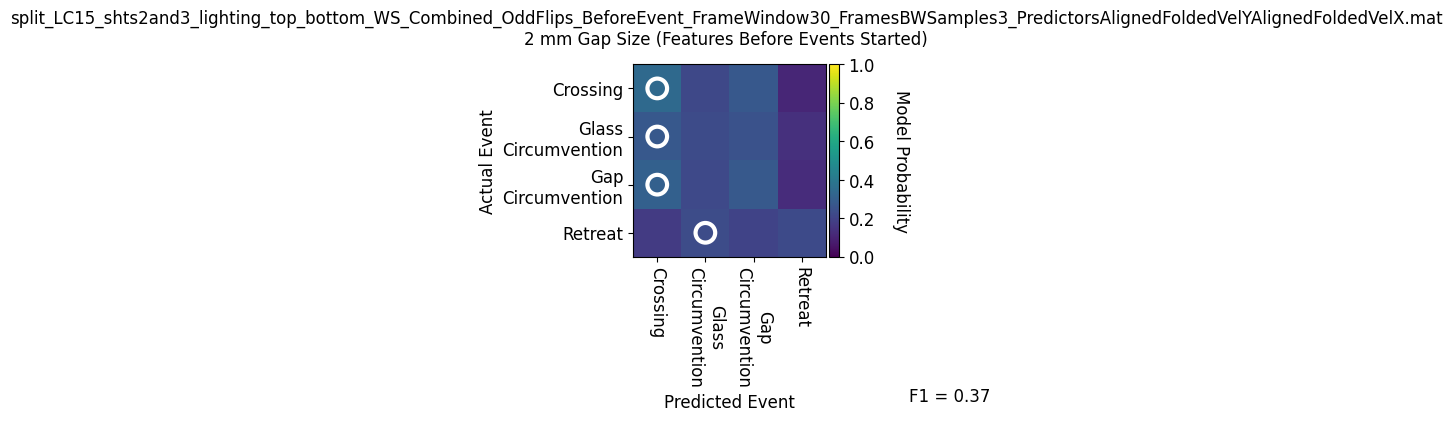

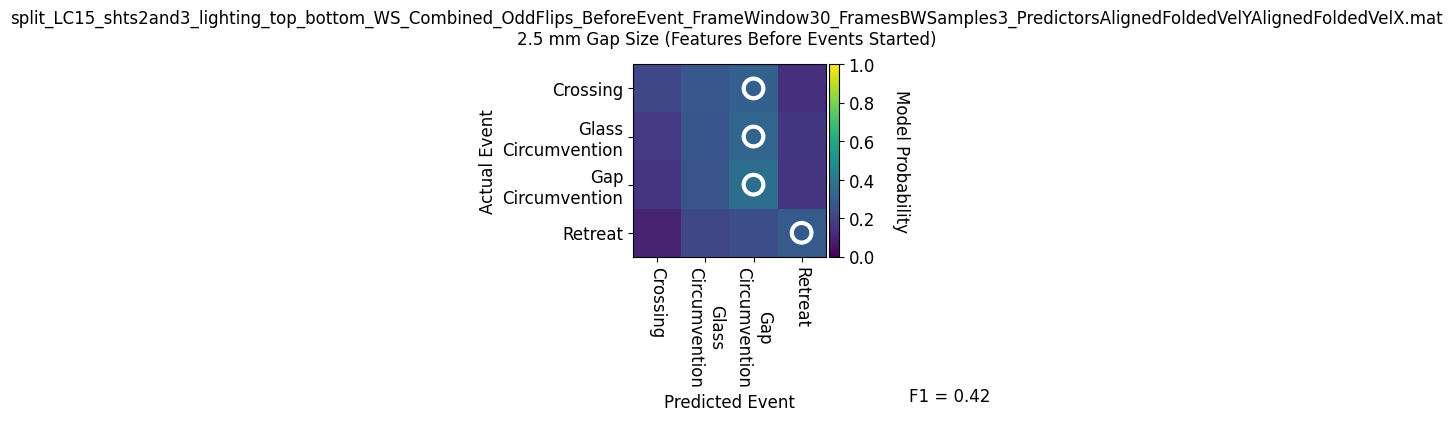

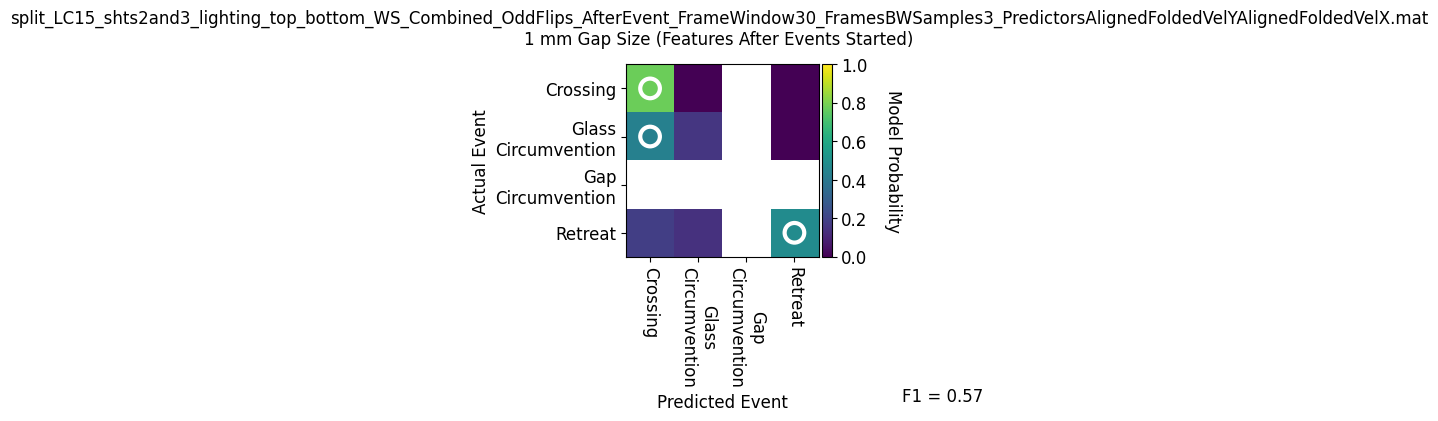

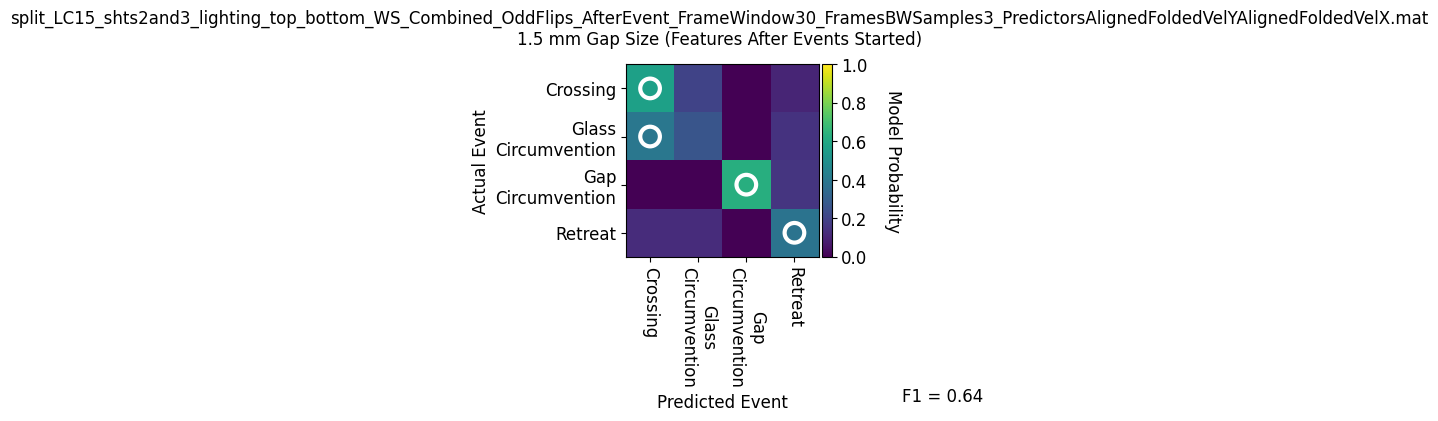

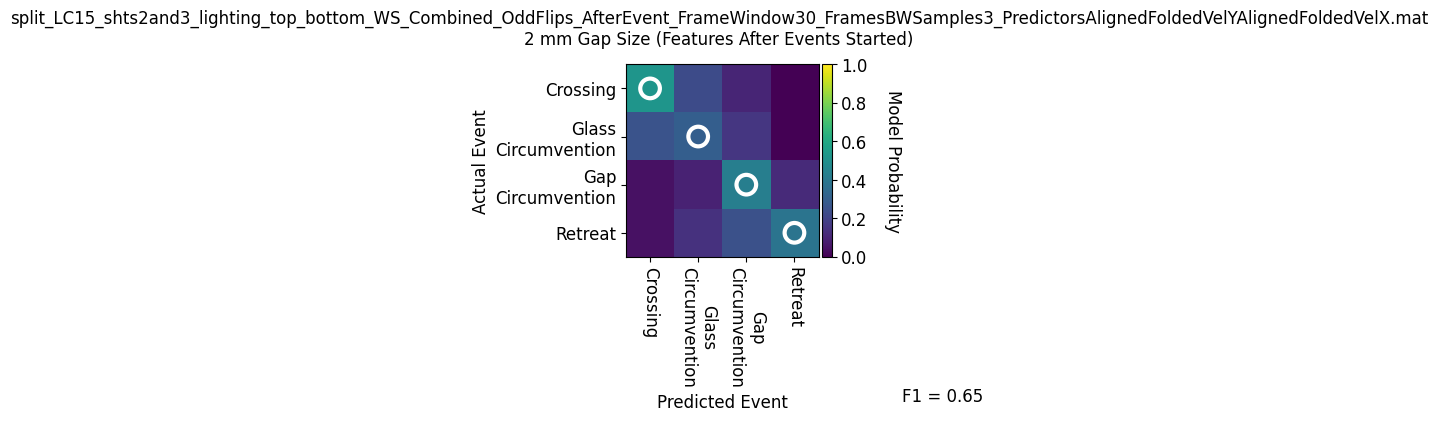

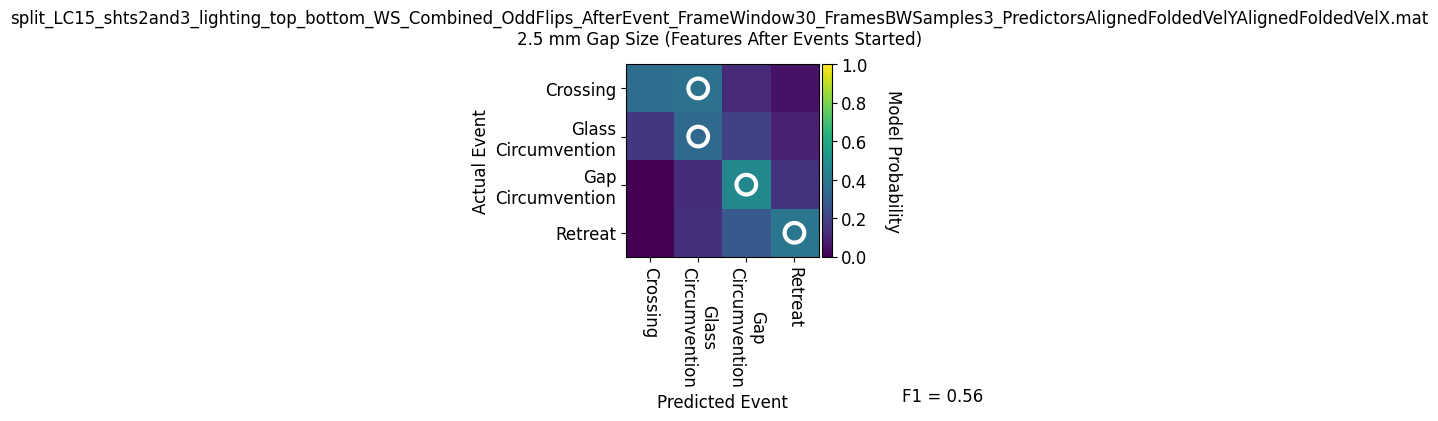

Finished


In [7]:
rnd_clf = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf = 0.01)

k=5
for file_name in file_names:
    mat = scipy.io.loadmat(home_dir + f'/data/{file_name}')
    events_list = mat['events_list'][:,0]
    gaps_list = mat['gaps_list'][:,0]
    predictors_mat = mat['predictors_mat']
    for i_gap in range(1,5):
        unique_events, counts = np.unique(events_list[gaps_list==i_gap], return_counts=True)
        bool_points = np.all([gaps_list==i_gap, np.isin(events_list, unique_events[counts>=10])],axis=0)
        test_probs = np.zeros( (4,4) ) * np.nan

        k_groups = GLM_utils.get_cross_val_groups(k, np.arange(np.sum(bool_points)))
        pred_probs = np.array([ [] for _ in range(len(np.unique(events_list[bool_points]))) ]).T
        actual_label = []
        for test_idxs in k_groups:
            test_bool = np.isin( np.arange(np.sum(bool_points)), test_idxs )
            sample_weights = np.zeros( np.sum(~test_bool) )
            for i_event in np.unique(events_list[bool_points][~test_bool]):
                sample_weights[ events_list[bool_points][~test_bool] == i_event ] = 1 / np.sum(events_list[bool_points][~test_bool] == i_event)
            rnd_clf.fit(predictors_mat[bool_points][~test_bool], events_list[bool_points][~test_bool], sample_weight=sample_weights)

            pred_probs = np.append( pred_probs, rnd_clf.predict_proba(predictors_mat[bool_points][test_bool]), axis=0 )
            actual_label = np.append(actual_label, events_list[bool_points][test_bool] )
        bool_cols = np.isin( np.arange(4), np.unique(events_list[bool_points])-1 )
        for i_label in np.unique(actual_label):
            test_probs[int(i_label)-1,bool_cols] = 10**np.nanmean( np.log10(pred_probs[i_label == actual_label]), axis=0)
            #print( i_label, 10**np.nanmean( np.log10(pred_probs[i_label == actual_label]), axis=0) )
        # Compute and plot first dendrogram.
        fig = plt.figure(figsize=(2.5,2.5))
        fontsize=12
        im = plt.imshow( test_probs, vmin=0, vmax=1)
        for row in range(test_probs.shape[0]):
            if np.any( test_probs[row] > -1):
                col = np.nanargmax(test_probs[row])
                plt.scatter( col, row, s = 200, marker = 'o', color = 'none', zorder=2, linewidth=3, edgecolor = 'white')
        plt.yticks(ticks = np.arange(4), labels = all_titles[0], fontsize=fontsize)  # remove axis labels
        plt.xticks(ticks = np.arange(4), labels = all_titles[0], fontsize=fontsize, rotation=270)  # remove axis labels
        plt.ylabel('Actual Event', fontsize=fontsize)
        plt.xlabel('Predicted Event', fontsize=fontsize)

        axcolor = fig.add_axes([0.91, 0.11, 0.04, 0.77])
        cbar = plt.colorbar(im, cax=axcolor, aspect = 100)
        cbar.set_label(label = 'Model Probability', fontsize=fontsize, rotation = 270, labelpad=25)
        cbar.ax.tick_params(labelsize=fontsize)
        end_title = 'Features After Events Started' if 'After' in file_name else 'Features Before Events Started'
        fig.suptitle(file_name + '\n' + all_titles[1][i_gap-1] + ' Gap Size (' + end_title + ')', fontsize=fontsize, y=1.1)
        tmp = all_titles[1][i_gap-1].replace('.','')
        f1 = f1_score(np.unique(actual_label, return_inverse=True)[1], np.argmax(pred_probs,axis=1), average='macro')
        plt.text(8, -0.75, f'F1 = {np.round(f1,decimals=2)}', fontsize=fontsize)
        plt.savefig(home_dir + f'/Figures/RandomForest/RandomForestGap_{tmp}_{file_name[:-4]}.svg', transparent=True, bbox_inches='tight')
        plt.show()
print('Finished')

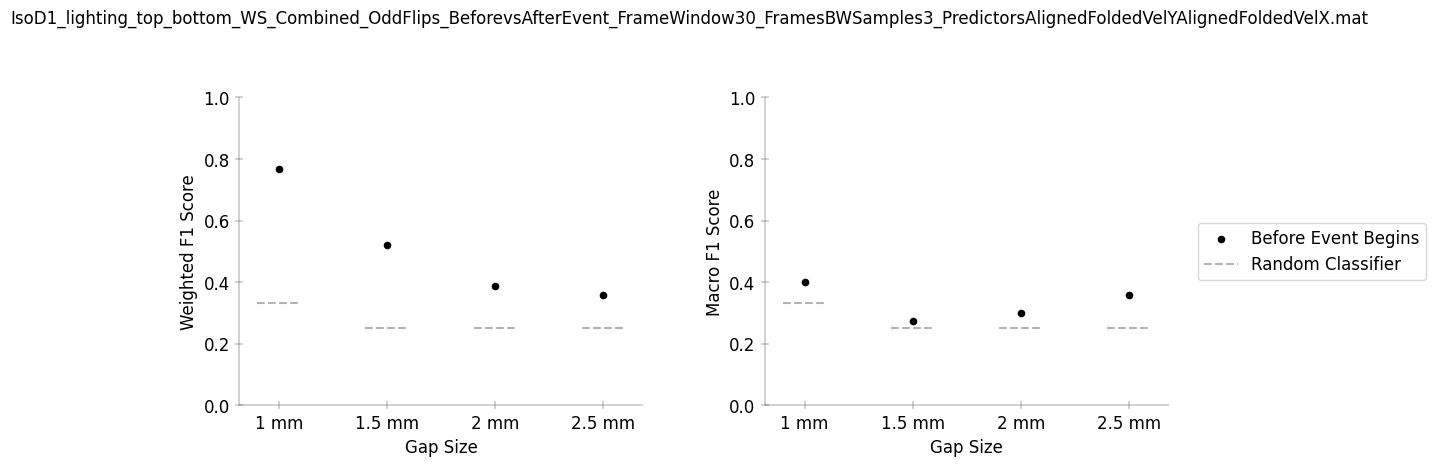

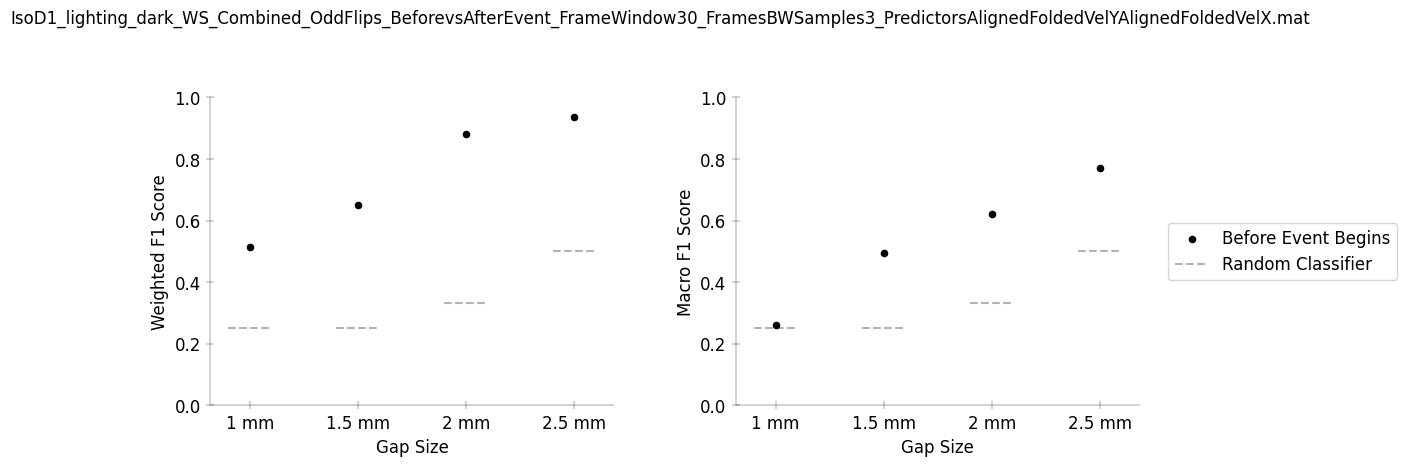

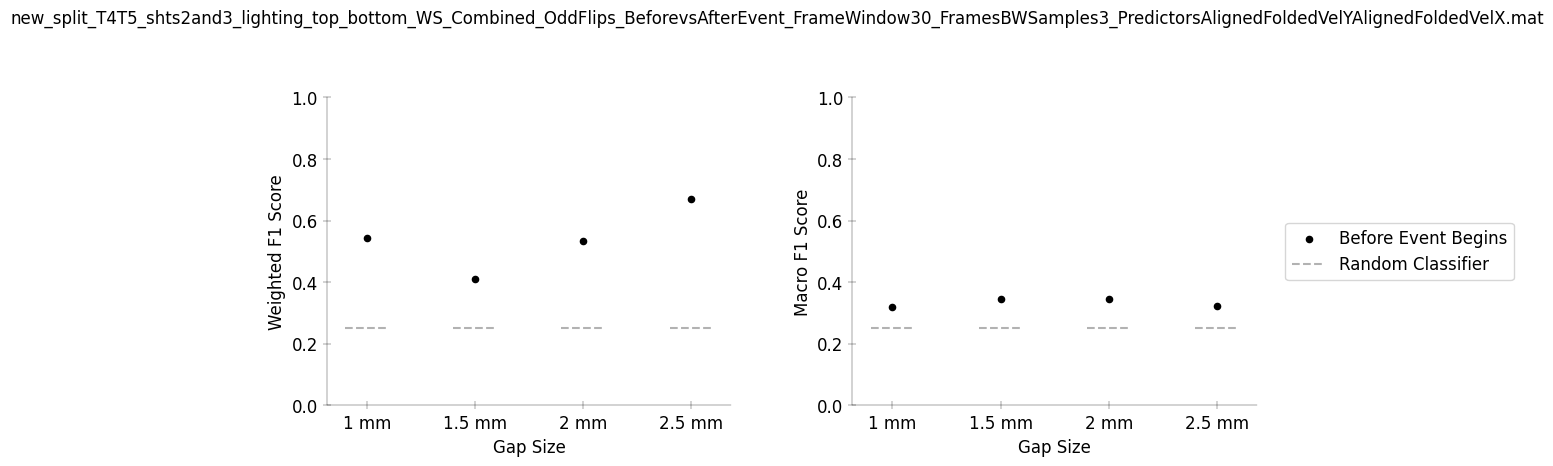

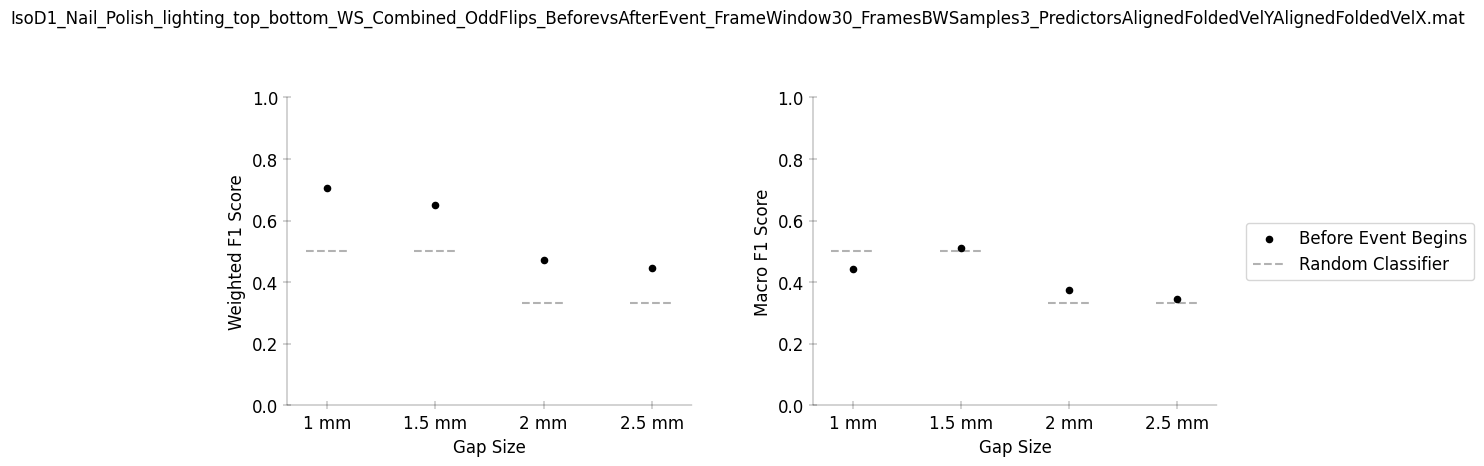

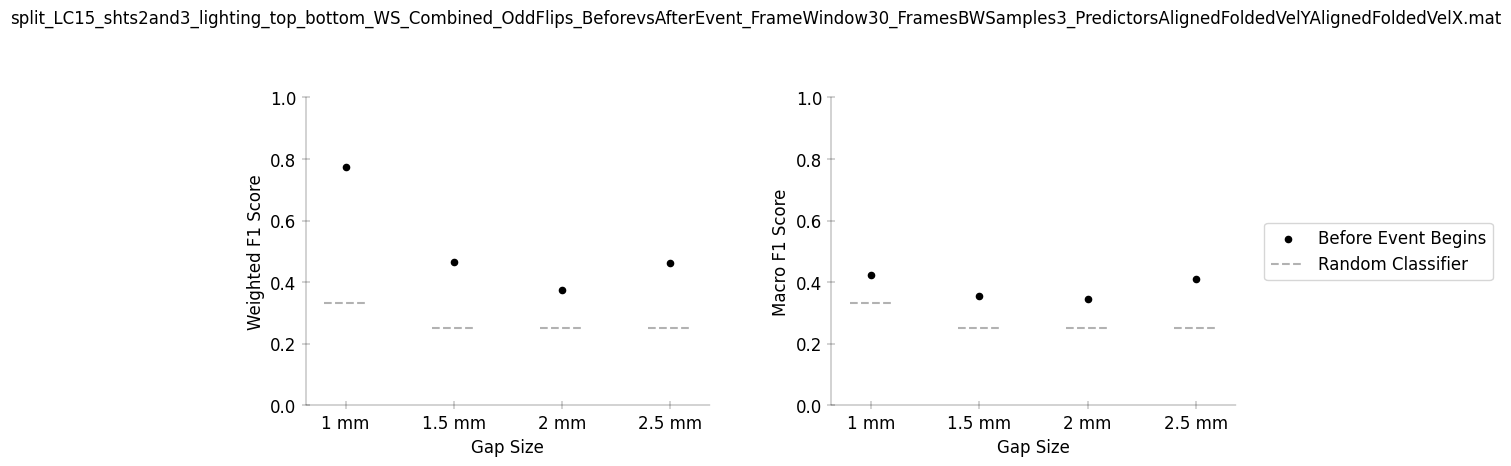

In [8]:
BAs = ['Before'] #['After', 'Before']
nFramesBAs = ['30']
framesBWSamples = ['3']
predictors = ['AlignedFoldedVelYAlignedFoldedVelX']
k = 5

avg_metrics = ['weighted', 'macro']
for orientation in orientations:
    for experiment in experiments:
        for nFramesBA in nFramesBAs:
            for framesBWSample in framesBWSamples:
                for predictor in predictors:
                    file_names_BA = [f'{experiment}_{orientation}Flips_{BA}Event_FrameWindow{nFramesBA}_FramesBWSamples{framesBWSample}_Predictors{predictor}.mat' for BA in BAs]
                    if np.all([isfile(home_dir + f'/data/{file_name}') for file_name in file_names_BA]):
                        # this experimental condition has a before and after
                        fig, ax = plt.subplots(figsize=(12,4), ncols = 2)
                        
                        for i_file in np.arange(len(BAs)):
                            mat = scipy.io.loadmat(home_dir + f'/data/{file_names_BA[i_file]}')
                            events_list = mat['events_list'][:,0]
                            gaps_list = mat['gaps_list'][:,0]
                            predictors_mat = mat['predictors_mat']
                            for i_gap in range(1,5):
                                unique_events, counts = np.unique(events_list[gaps_list==i_gap], return_counts=True)
                                bool_points = np.all([gaps_list==i_gap, np.isin(events_list, unique_events[counts>=10])],axis=0)
                                test_probs = np.zeros( (4,4) ) * np.nan

                                k_groups = GLM_utils.get_cross_val_groups(k, np.arange(np.sum(bool_points)))
                                pred_probs = np.array([ [] for _ in range(len(np.unique(events_list[bool_points]))) ]).T
                                actual_label = []
                                for test_idxs in k_groups:
                                    test_bool = np.isin( np.arange(np.sum(bool_points)), test_idxs )
                                    sample_weights = np.zeros( np.sum(~test_bool) )
                                    for i_event in np.unique(events_list[bool_points][~test_bool]):
                                        sample_weights[ events_list[bool_points][~test_bool] == i_event ] = 1 / np.sum(events_list[bool_points][~test_bool] == i_event)
                                    rnd_clf.fit(predictors_mat[bool_points][~test_bool], events_list[bool_points][~test_bool], sample_weight=sample_weights)

                                    pred_probs = np.append( pred_probs, rnd_clf.predict_proba(predictors_mat[bool_points][test_bool]), axis=0 )
                                    actual_label = np.append(actual_label, events_list[bool_points][test_bool] )
                                for i_axes, avg_metric in enumerate(avg_metrics):
                                    f1 = f1_score(np.unique(actual_label, return_inverse=True)[1], np.argmax(pred_probs,axis=1), average=avg_metric)
                                    color = 'k' if i_file == 0 else 'r'
                                    if i_gap == 1:
                                        ax[i_axes].scatter(i_gap, f1, s = 20, color = color, label = BAs[i_file] + ' Event Begins')
                                    else:
                                        ax[i_axes].scatter(i_gap, f1, s = 20, color = color)
                                    if i_file == 0 or i_file == 1:
                                        if i_gap == 1:
                                            ax[i_axes].plot(np.array([-0.2, 0.2])+i_gap, np.ones(2)/pred_probs.shape[1], color = 'k', alpha = 0.3, linestyle = 'dashed', label = 'Random Classifier')
                                        else:
                                            ax[i_axes].plot(np.array([-0.2, 0.2])+i_gap, np.ones(2)/pred_probs.shape[1], color = 'k', alpha = 0.3, linestyle = 'dashed')
                        for i_axes, avg_metric in enumerate(avg_metrics):
                            format_axes(ax[i_axes], fontsize)
                            ax[i_axes].set_xticks(np.arange(1,5))
                            ax[i_axes].set_xticklabels(all_titles[1])
                            ax[i_axes].set_ylim([0,1])
                            ax[i_axes].set_ylabel(avg_metric.title() + ' F1 Score', fontsize=fontsize)
                            ax[i_axes].set_xlabel('Gap Size', fontsize=fontsize)
                        ax[-1].legend(fontsize=fontsize, loc = 'center left', bbox_to_anchor = (1.05,0.5))
                        file_name = f'{experiment}_{orientation}Flips_BeforevsAfterEvent_FrameWindow{nFramesBA}_FramesBWSamples{framesBWSample}_Predictors{predictor}.mat'
                        fig.suptitle(file_name, fontsize=fontsize, y=1.1)
                        fig.subplots_adjust(wspace=0.3)
                        
                        file_name = f'F1_{experiment}_{orientation}Flips_BeforevsAfterEvent_FrameWindow{nFramesBA}_FramesBWSamples{framesBWSample}_Predictors{predictor}'
                        plt.savefig(home_dir + f'/Figures/RandomForest/{file_name}.svg', transparent=True, bbox_inches='tight')
                        plt.show()

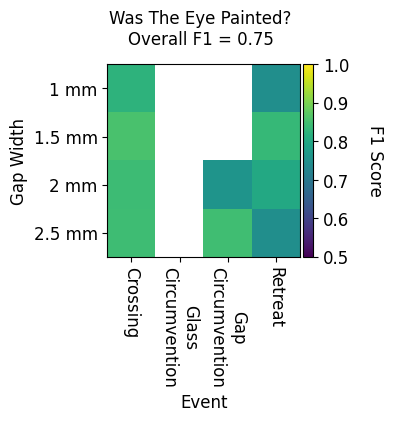

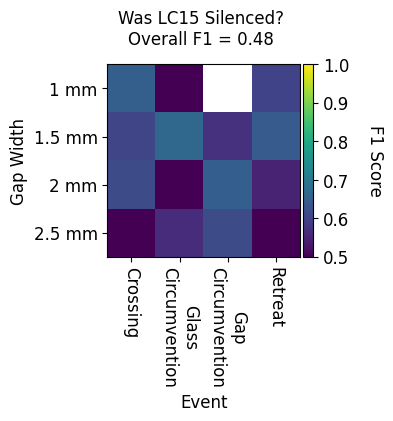

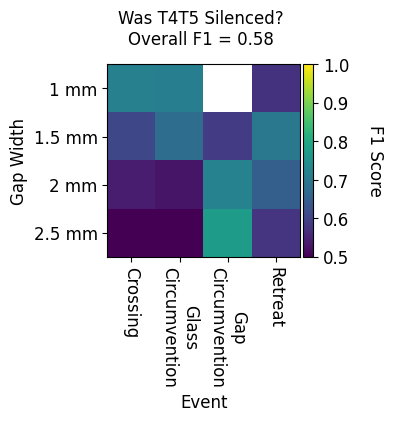

In [13]:
pairwise_files = [['IsoD1_Nail_Polish_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat', 
                   'IsoD1_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat'], 
                  ['split_LC15_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat', 
                   'IsoD1_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat'], 
                  ['new_split_T4T5_shts2and3_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat', 
                   'IsoD1_lighting_top_bottom_WS_Combined_OddFlips_BeforeEvent_FrameWindow30_FramesBWSamples3_PredictorsAlignedFoldedVelYAlignedFoldedVelX.mat']]

test_titles = ['Was The Eye Painted?', 'Was LC15 Silenced?', "Was T4T5 Silenced?"]

'''
For all three pairs of files, run a classifier to tell whether the before event features are significantly different for each of the 4 events and gap sizes (16 total)
Produce a 4x4 matrix showing the individual F1 scores, as well as the overall F1 score

FUTURE: null file (second one) will change later
There may be more than one null file. If so, analyze both
'''
ii = -1
for test_null_files in pairwise_files:
    ii += 1
    
    events_list, gaps_list, predictors_mat, is_null = [], [], [], []
    for i_file in range(2):
        mat = scipy.io.loadmat(home_dir + f'/data/{test_null_files[i_file]}')
        events_list = np.append( events_list, mat['events_list'][:,0] )
        gaps_list = np.append( gaps_list, mat['gaps_list'][:,0] )
        predictors_mat.append( mat['predictors_mat'] )
        is_null = np.append( is_null, np.zeros(len(mat['predictors_mat'])) ) if i_file == 0 else np.append( is_null, np.ones(len(mat['predictors_mat'])) )
    predictors_mat = np.concatenate( predictors_mat, axis=0 )

    f1s = np.zeros((4,4)) + np.nan
    all_actual_label, all_pred_label = [], []
    for i_gap in range(1,5):
        # list of viable events in both genotypes
        all_unique_events = []
        for this_is_null in [0,1]:
            this_unique_events, counts = np.unique(events_list[is_null == this_is_null][gaps_list[is_null == this_is_null]==i_gap], return_counts=True)
            all_unique_events = np.append(all_unique_events, this_unique_events[ counts >= 10 ] )
        unique_events, counts = np.unique(all_unique_events, return_counts = True)
        
        unique_events = unique_events[ counts == 2 ]
        for event in unique_events:
            bool_points = np.all([gaps_list==i_gap, events_list==event],axis=0)

            k_groups = GLM_utils.get_cross_val_groups(k, np.arange(np.sum(bool_points)))
            actual_label, pred_label = [], []
            for test_idxs in k_groups:
                test_bool = np.isin( np.arange(np.sum(bool_points)), test_idxs )
                sample_weights = np.zeros( np.sum(~test_bool) )
                for __ in [0,1]:
                    sample_weights[ is_null[bool_points][~test_bool] == __ ] = 1 / np.sum(is_null[bool_points][~test_bool] == __)
                rnd_clf.fit(predictors_mat[bool_points][~test_bool], is_null[bool_points][~test_bool], sample_weight=sample_weights)
    
                pred_label = np.append( pred_label, rnd_clf.predict(predictors_mat[bool_points][test_bool]), axis=0 )
                actual_label = np.append(actual_label, is_null[bool_points][test_bool] )
            f1s[i_gap-1,int(event)-1] = f1_score(actual_label, pred_label, average='macro')
            all_actual_label = np.append( all_actual_label, actual_label)
            all_pred_label = np.append( all_pred_label, pred_label)
            
    # Compute matrix of f1 scores
    fig = plt.figure(figsize=(2.5,2.5))
    fontsize=12
    im = plt.imshow( f1s, vmin=0.5, vmax=1)
    plt.yticks(ticks = np.arange(4), labels = all_titles[1], fontsize=fontsize)  # remove axis labels
    plt.xticks(ticks = np.arange(4), labels = all_titles[0], fontsize=fontsize, rotation=270)  # remove axis labels
    plt.ylabel('Gap Width', fontsize=fontsize)
    plt.xlabel('Event', fontsize=fontsize)

    axcolor = fig.add_axes([0.91, 0.11, 0.04, 0.77])
    cbar = plt.colorbar(im, cax=axcolor, aspect = 100)
    cbar.set_label(label = 'F1 Score', fontsize=fontsize, rotation = 270, labelpad=25)
    cbar.ax.tick_params(labelsize=fontsize)

    overall_f1 = np.round(f1_score(actual_label, pred_label, average='macro'), decimals = 2)
    
    fig.suptitle(f'{test_titles[ii]}\nOverall F1 = {overall_f1}', fontsize=fontsize, y=1.1)
    plt.savefig(home_dir + f'/Figures/RandomForest/TestFlyCondition_{test_null_files[0][:-4]}.svg', transparent=True, bbox_inches='tight')
    plt.show()

In [10]:
BAs = ['After', 'Before']
for orientation in orientations:
    for experiment in experiments:
        for nFramesBA in nFramesBAs:
            for framesBWSample in framesBWSamples:
                for predictor in predictors:
                    file_names_BA = [f'{experiment}_{orientation}Flips_{BA}Event_FrameWindow{nFramesBA}_FramesBWSamples{framesBWSample}_Predictors{predictor}.mat' for BA in BAs]
                    if np.all([isfile(home_dir + f'/data/{file_name}') for file_name in file_names_BA]) and experiment == 'IsoD1_lighting_dark_WS_Combined':
                        for i_gap in range(1,5):
                            for i_file in [0,1]:
                                mat = scipy.io.loadmat(home_dir + f'/data/{file_names_BA[i_file]}')
                                events_list = mat['events_list'][:,0]
                                gaps_list = mat['gaps_list'][:,0]
                                predictors_mat = mat['predictors_mat']
                                unique_events, counts = np.unique(events_list[gaps_list==i_gap], return_counts=True)
                                bool_points = np.all([gaps_list==i_gap, np.isin(events_list, unique_events[counts>=10])],axis=0)
                                print( all_titles[1][i_gap-1], unique_events, counts, BAs[i_file])

1 mm [1 2 3 4] [250  24  63  63] After
1 mm [1 2 3 4] [250  24  63  63] Before
1.5 mm [1 2 3 4] [ 82  42 316  96] After
1.5 mm [1 2 3 4] [ 82  42 316  96] Before
2 mm [1 2 3 4] [  7  24 321  39] After
2 mm [1 2 3 4] [  7  24 321  39] Before
2.5 mm [1 2 3 4] [  1   8 328  28] After
2.5 mm [1 2 3 4] [  1   8 328  28] Before
